In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
%matplotlib notebook
import os
import re
import time
import random
from matplotlib.font_manager import FontProperties
import math
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from collections import Counter
matplotlib.rcParams['mathtext.fontset']='stix'
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rc('font', family="Times New Roman")
from matplotlib import font_manager
times_new_roman = font_manager.FontProperties(fname="C:\Windows\Fonts\\times.ttf")
simsun = font_manager.FontProperties(fname="C:\Windows\Fonts\\simsun.ttc")
import glob
import csv
import read_write as rw
import os
import re
import numpy as np

def Deformation_to_dat(data):
    x = np.linspace(0, 10, np.size(data))  # x轴数据
    y = data

    x_start, x_end = x[0], x[-1]
    y_start, y_end = y[0], y[-1]

    slope = (y_end - y_start) / (x_end - x_start)
    intercept = y_start - slope * x_start
    y_adjusted = y - (slope * x + intercept)
    return y_adjusted

import csv
import pandas as pd
def get_lim_index(x, pathnm, mu):
    min_id,max_id = 0,0
    for i in range(len(x)):
        if x[i] > -pathnm:
            min_id = i-1
            break
    for i in range(len(x)):
        if x[i] > pathnm:
            max_id = i+1
            break
    return min_id,max_id
def read_30nm_def(file_name):
    data_ref = []
    data_x = []
    data_rms = []
    with open(file_name + '\\deformation_trans.csv', mode='r') as file:
        reader = csv.reader(file)
        ii = 0
        for row in reader:
            data_floatx = []
            data_float = []
            if ii%2 == 0:
                for i in row:
                    data_floatx.append(float(i))
                data_x = data_floatx
            else:
                for i in row:
                    data_float.append(float(i)*1e9)
                data_ref.append(np.array(data_float))
                data_rms.append(np.std(data_ref[-1]))
            ii+=1
            
    data = []
    with open(file_name + '\\GeometryParameters.txt', mode='r') as file:
        for line in file:
            data_cache = []
            values = line.strip().split(' ')
            data_cache.append(float(values[-15]))
            data_cache.append(float(values[-14]))
            data_cache.append(float(values[-13]))
            data.append(data_cache)
    return np.array(data_ref), np.array(data_rms), data, data_x

cwd = os.getcwd()

def polyfit_2rd(x, data):
    # 假设 A 是一个包含数据的二维数组，第一列是 x，第二列是 y
    A = np.array([x,data]).T  # 替换成你的数据

    # 1. 提取 x 和 y 数据
    x = A[:, 0]
    y = A[:, 1]

    # 2. 使用二次多项式拟合数据
    p = np.polyfit(x, y, 2)  # 二次多项式拟合
    y1 = p[0] * x**2 + p[1] * x + p[2]  # 拟合的 y 值
    y2 = y - y1  # 去除二次面型后的差异
    O = np.column_stack((x, y2))  # 新的数据矩阵 O

    # 3. 计算去趋势数据的均方根误差 (Fs2) 和标准差 (Fh2)
    a = len(O)
    B = O[1, 0] - O[0, 0]  # 相邻 x 的差

    D = np.zeros(a - 1)
    for l in range(a - 1):
        D[l] = ((O[l + 1, 1] - O[l, 1]) / B) ** 2

    Fs2 = np.sqrt(np.mean(D))  # 均方根误差

    P = np.mean(O[:, 1])  # 平均值
    M = np.zeros(a)
    for k in range(a):
        M[k] = (O[k, 1] - P) ** 2

    Fh2 = np.sqrt(np.mean(M))  # 标准差

    # 4. 计算原始数据的均方根误差 (Fs1) 和标准差 (Fh1)
    a2 = len(A)
    B2 = A[1, 0] - A[0, 0]  # 相邻 x 的差

    D2 = np.zeros(a2 - 1)
    for m in range(a2 - 1):
        D2[m] = ((A[m + 1, 1] - A[m, 1]) / B2) ** 2

    Fs1 = np.sqrt(np.mean(D2))  # 均方根误差

    P2 = np.mean(A[:, 1])  # 平均值
    M2 = np.zeros(a2)
    for n in range(a2):
        M2[n] = (A[n, 1] - P2) ** 2

    Fh1 = np.sqrt(np.mean(M2))  # 标准差

    # 5. 计算曲率相关量 fR
    ak = A[a2 - 1, 0] / 2
    fR = ((1 + (2 * p[0] * ak + p[1]) ** 2) ** 1.5) / abs(2 * p[0])
    return y, y1

<IPython.core.display.Javascript object>


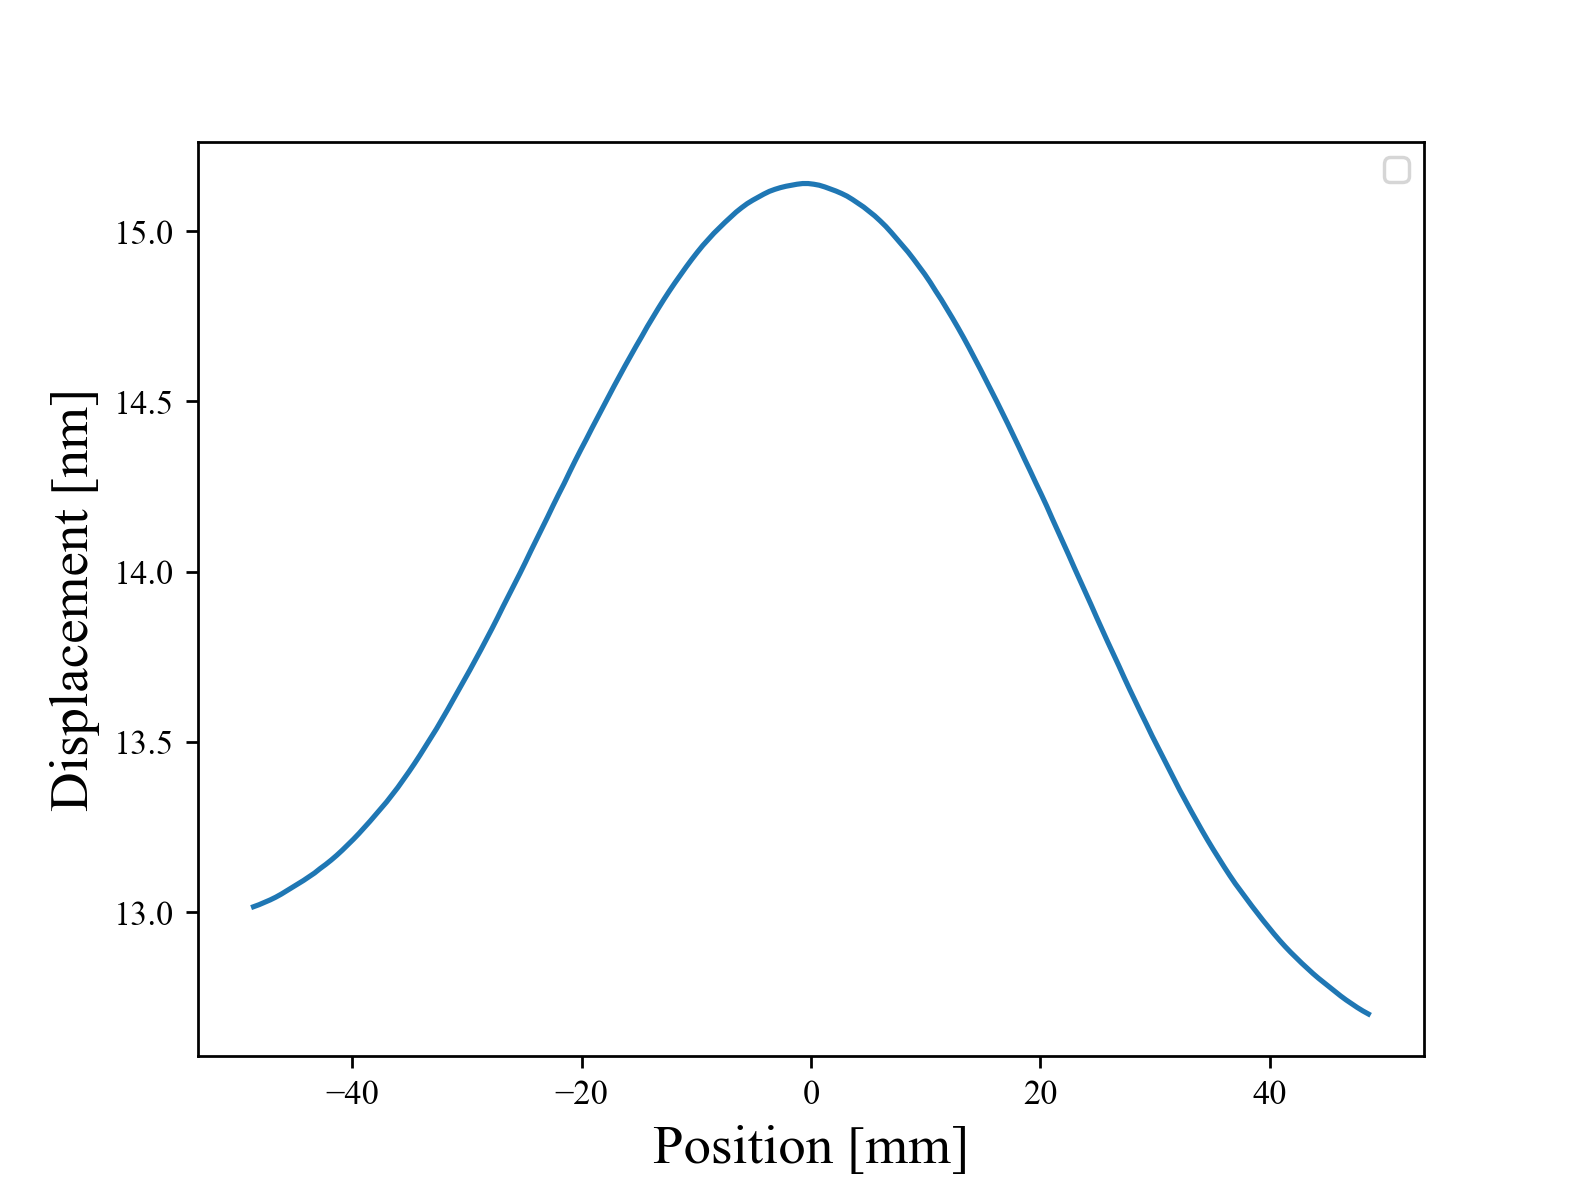

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.7952526760365289, 51.07825453327199]


<IPython.core.display.Javascript object>


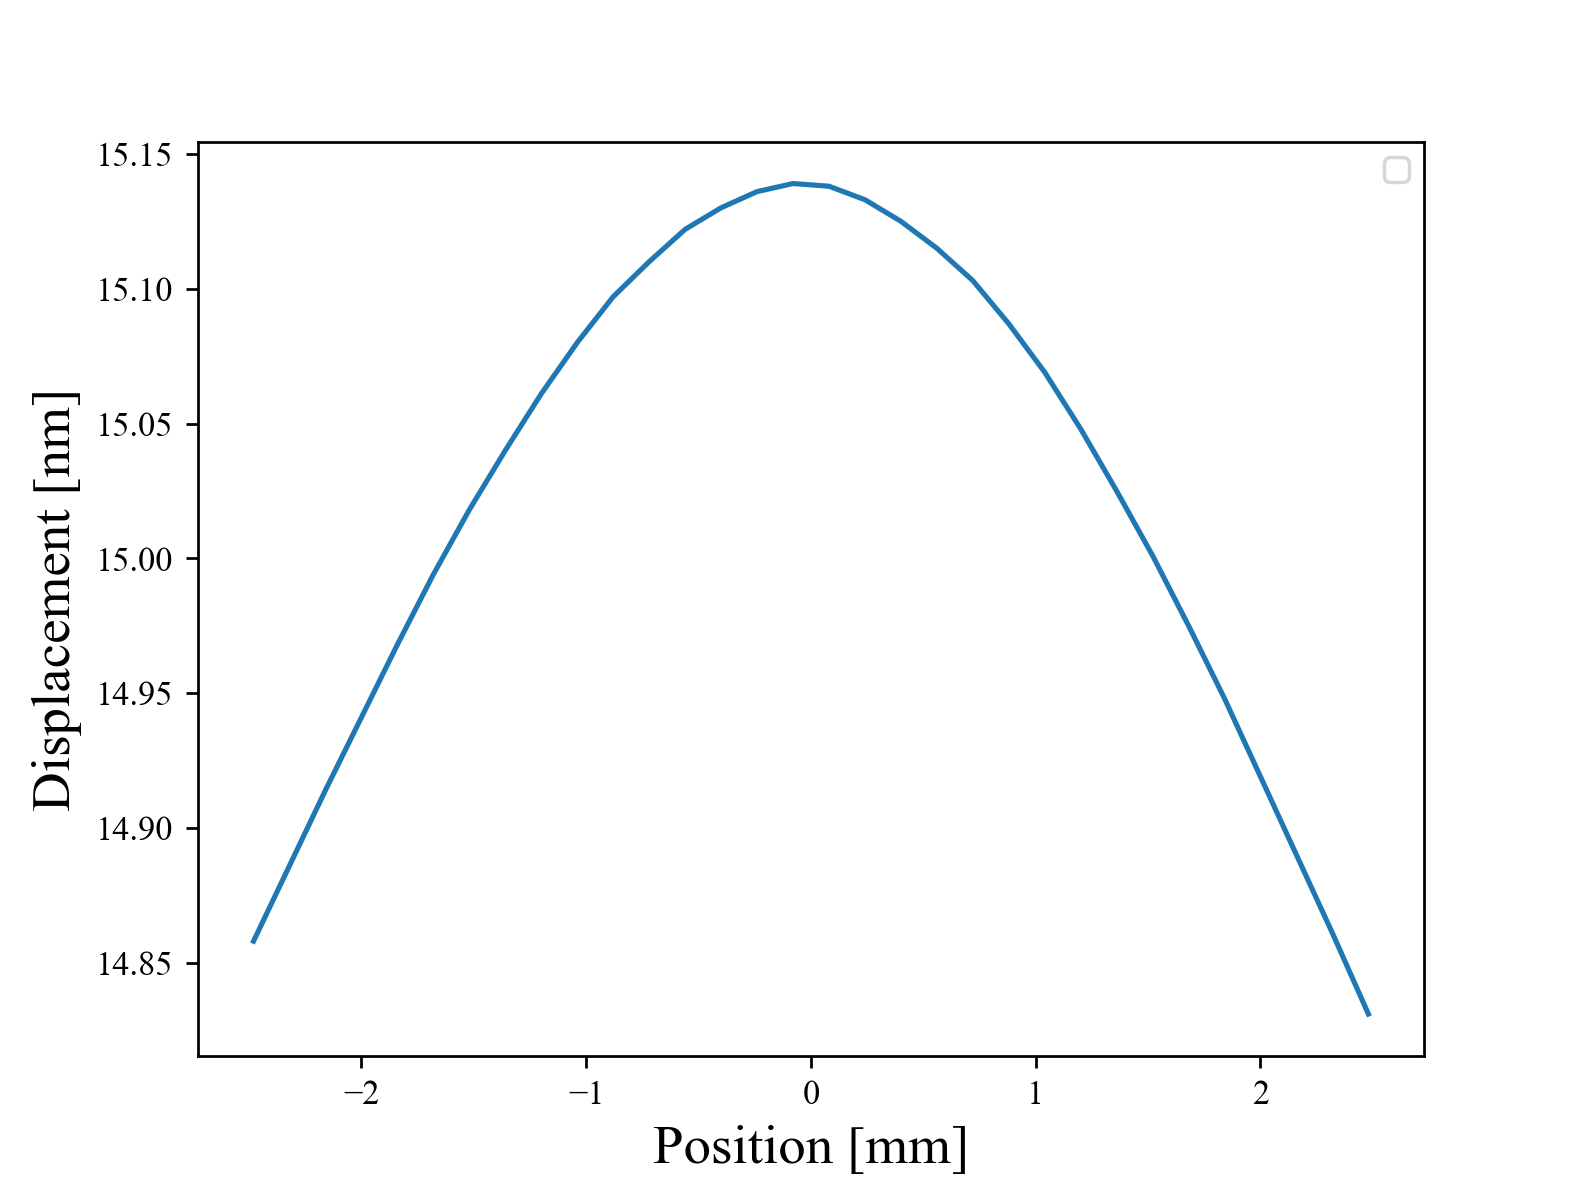

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.09543172870565679, 130.6171564966852]


<IPython.core.display.Javascript object>


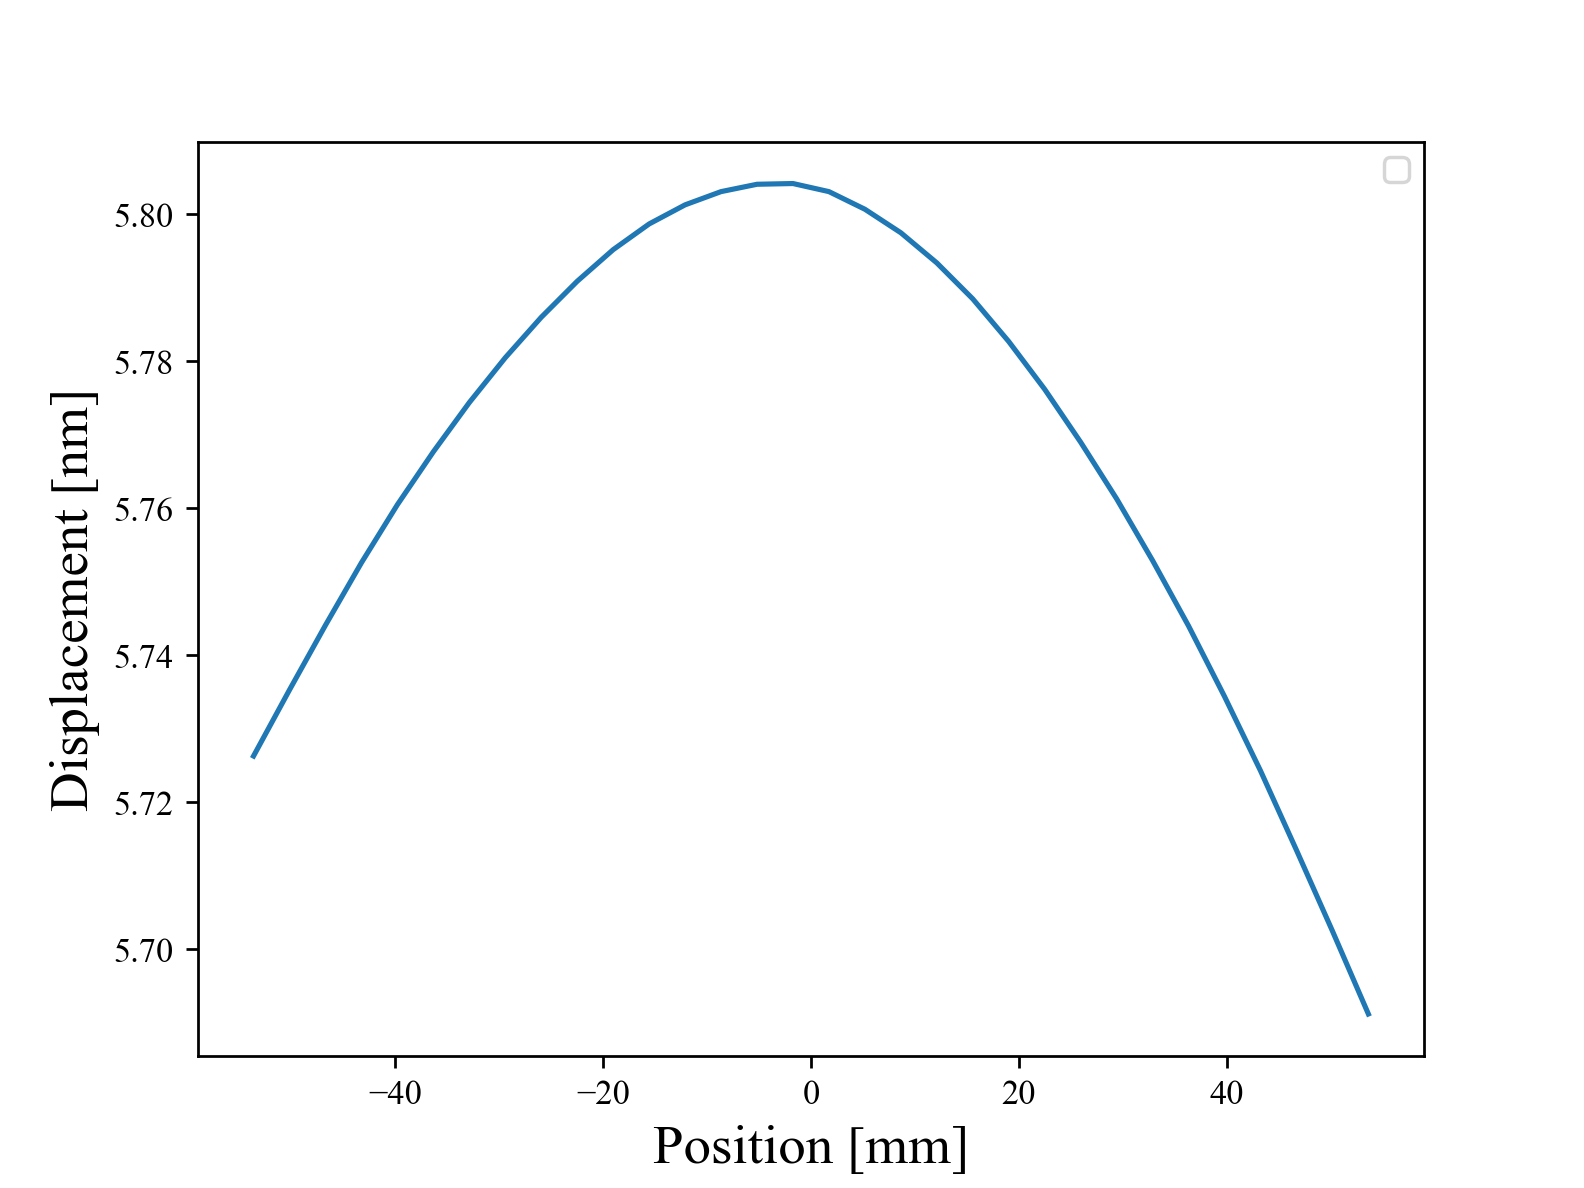

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.03207173097502502, 1.9692882241905034]


<IPython.core.display.Javascript object>


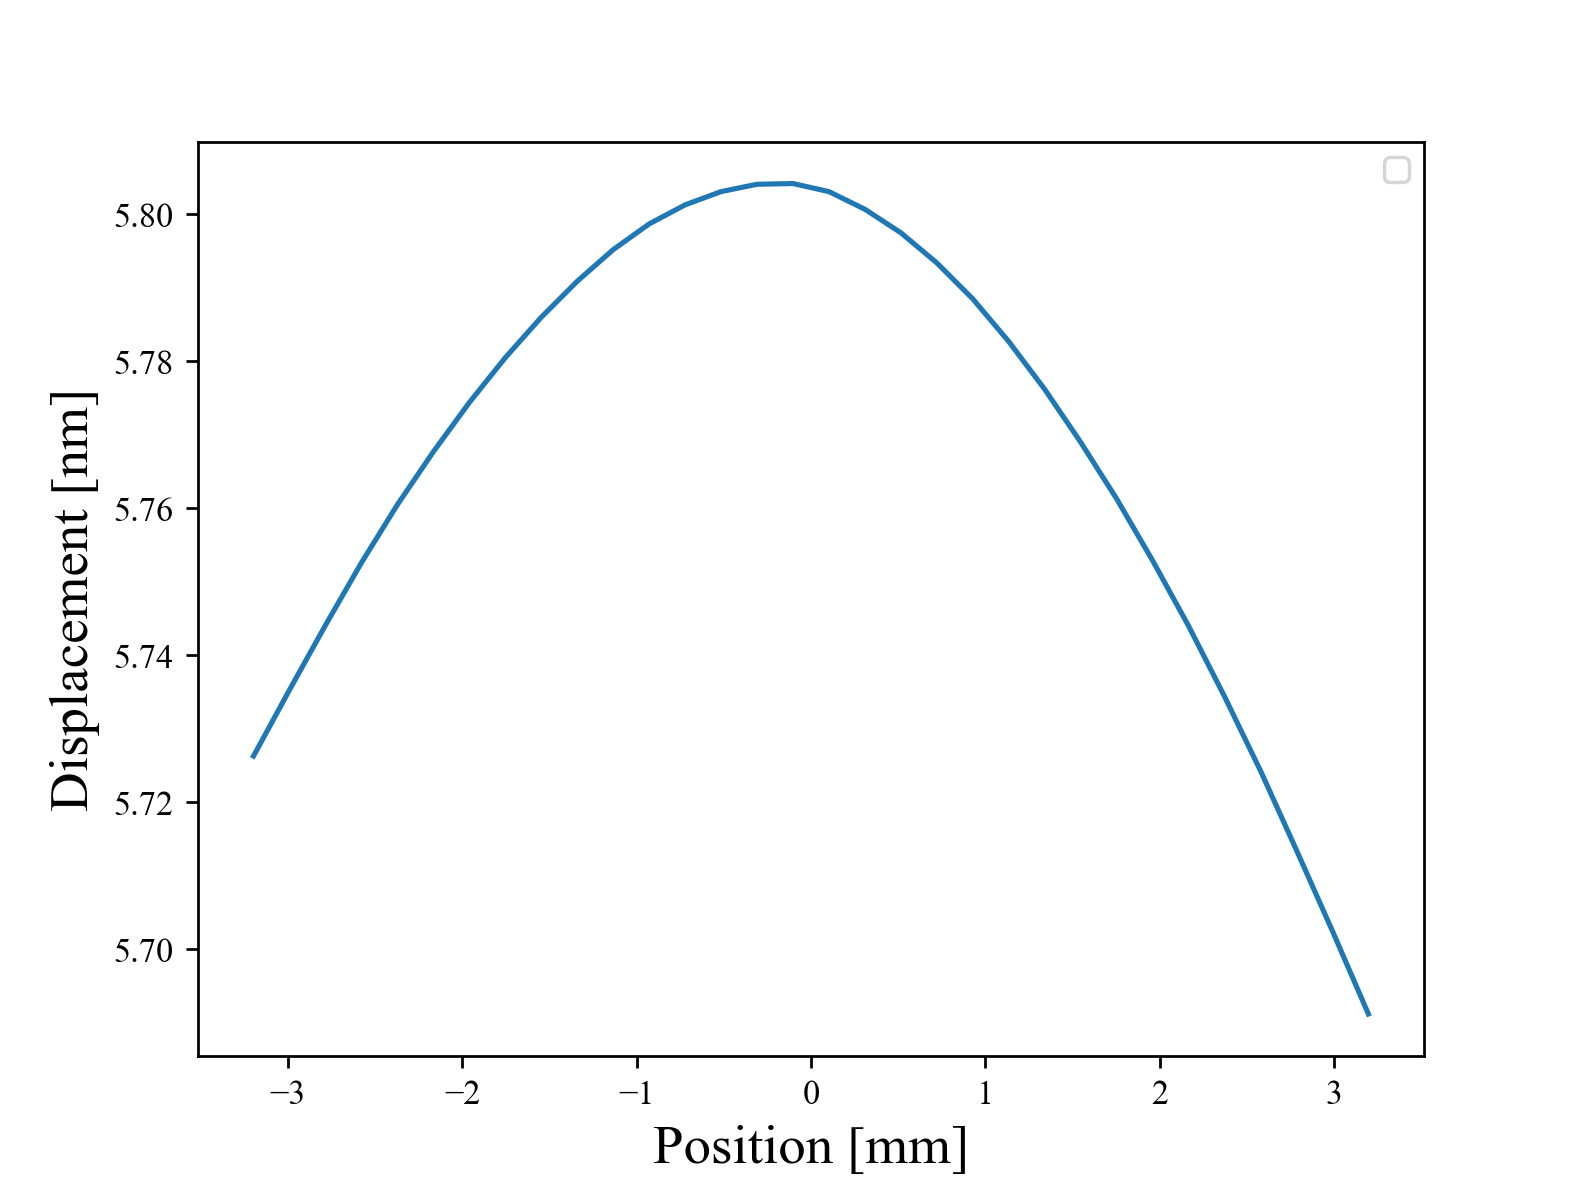

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.03207173097502502, 33.01997011781676]


<IPython.core.display.Javascript object>


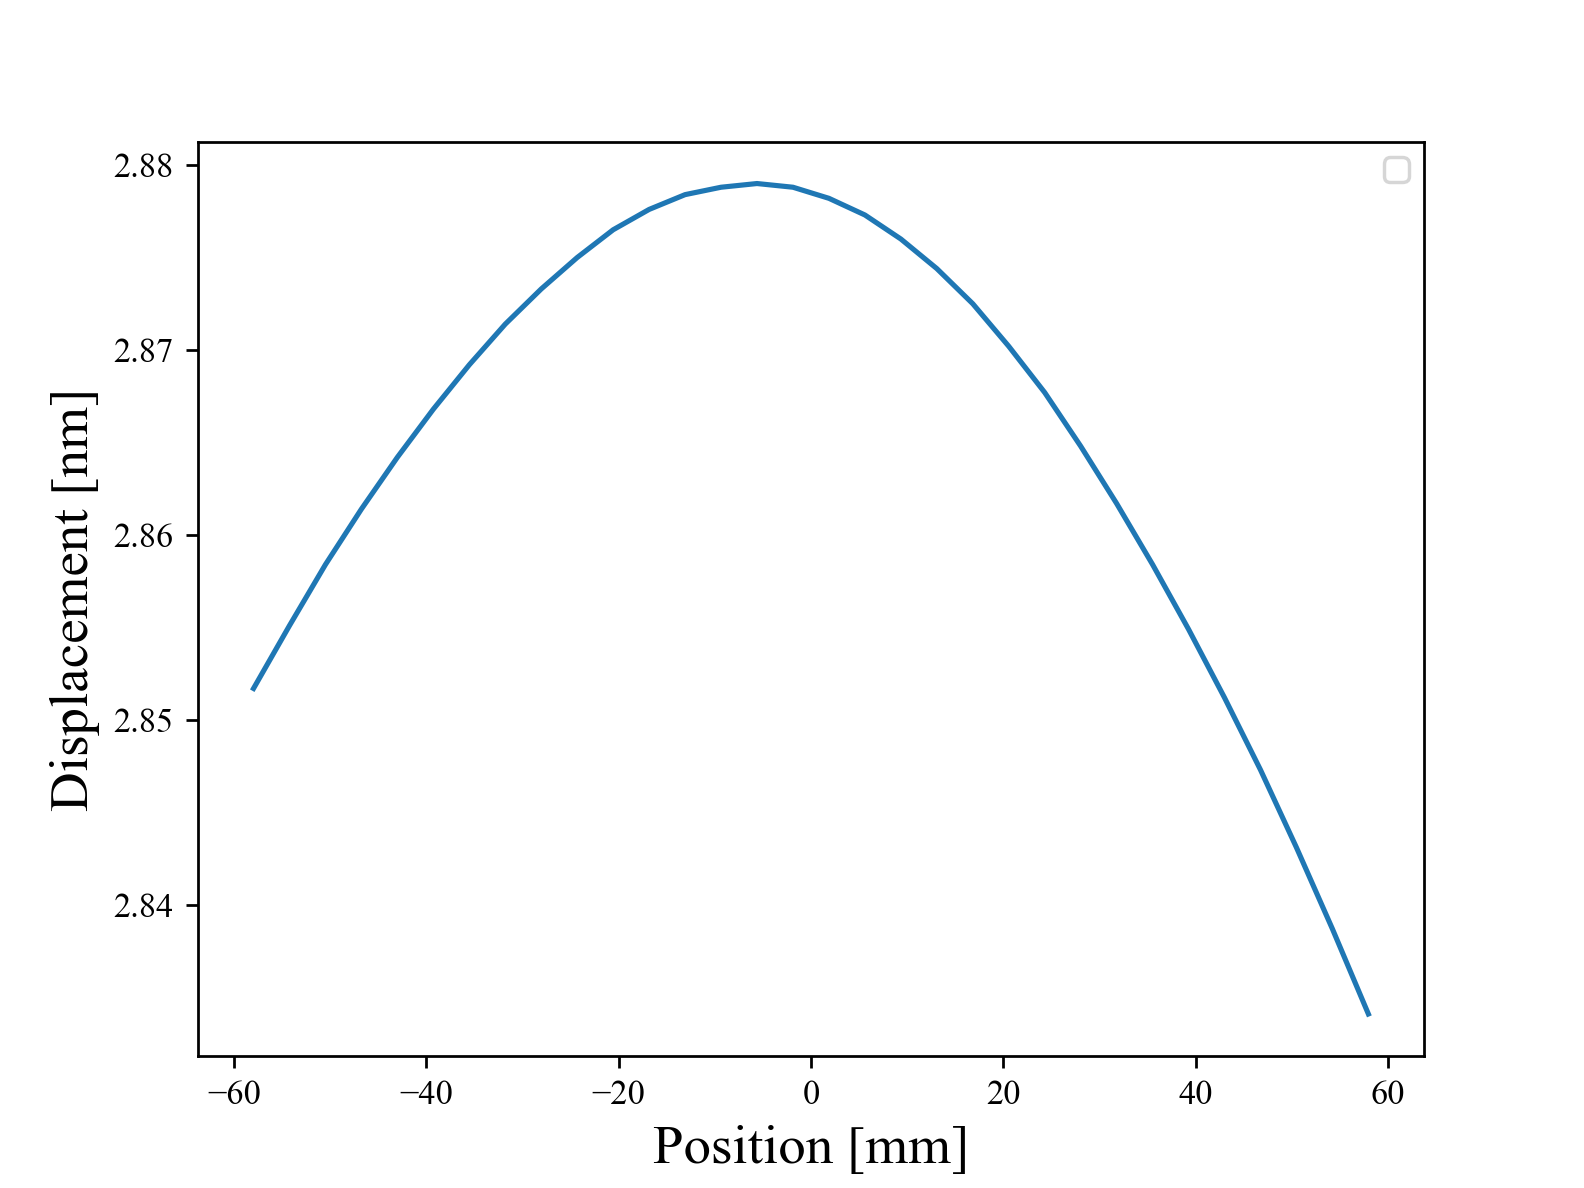

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.012526081774017568, 0.6896192109098638]


<IPython.core.display.Javascript object>


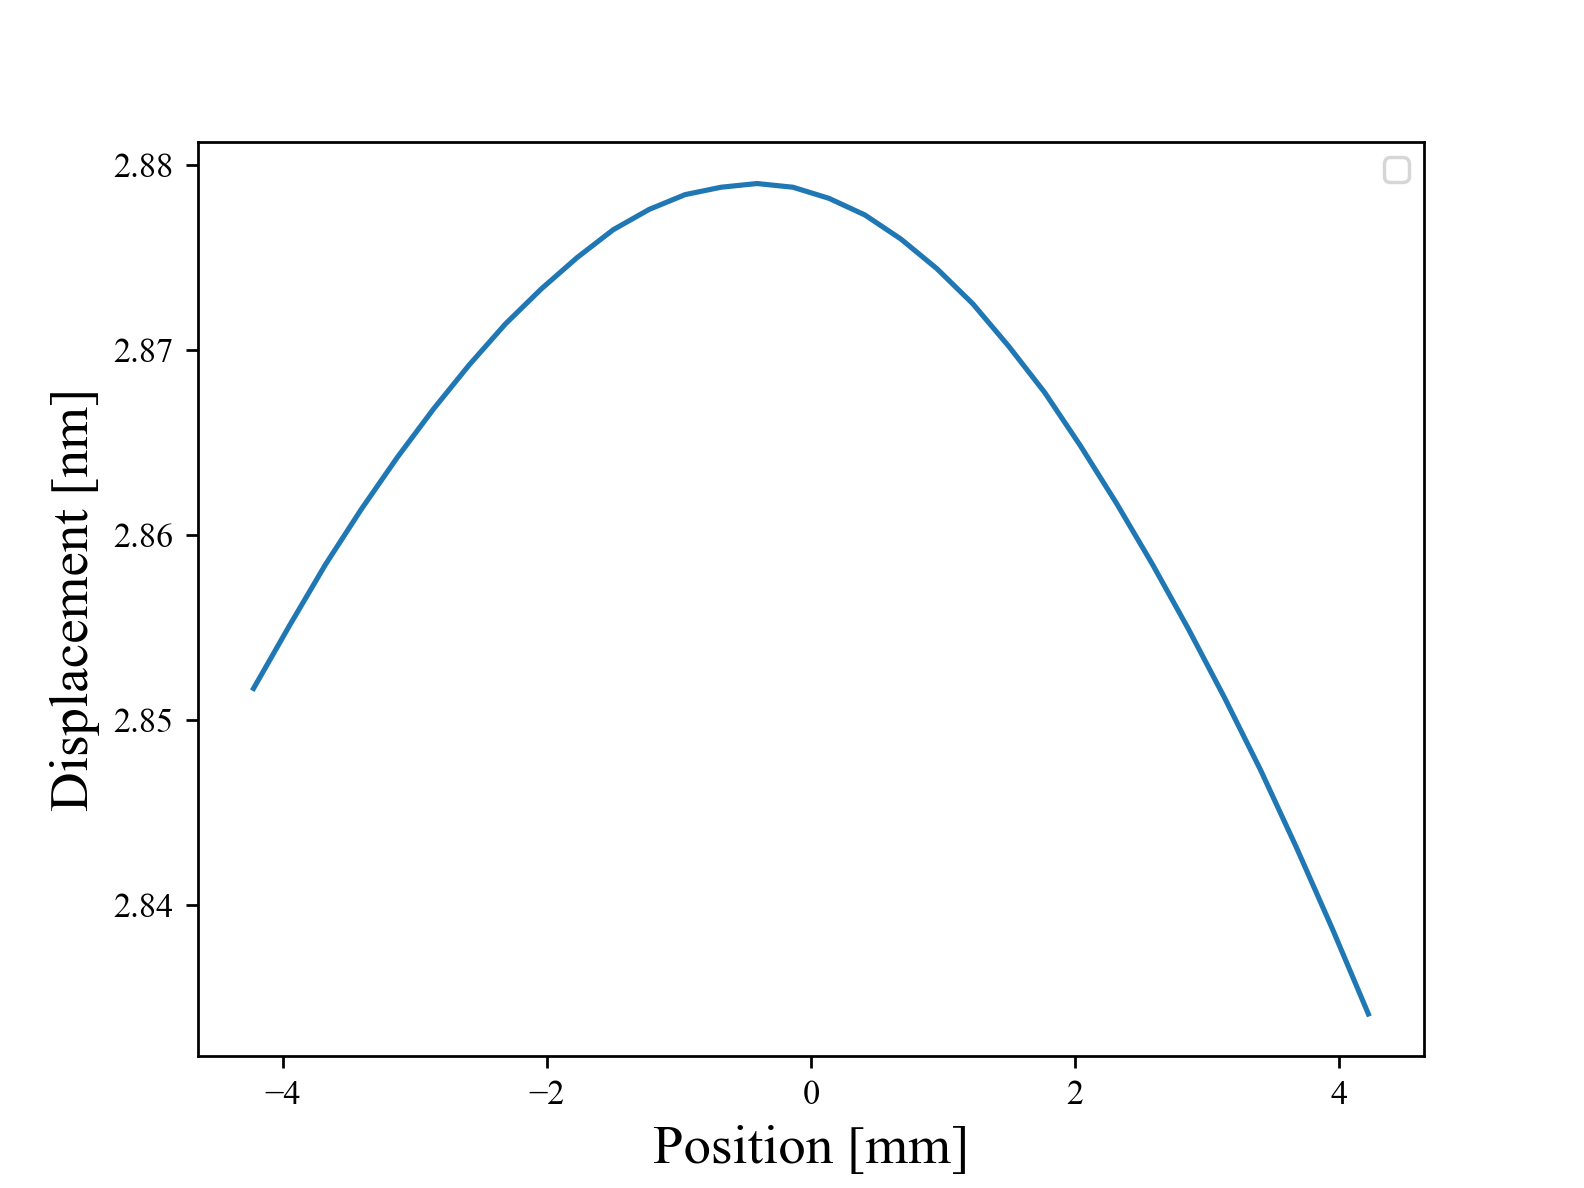

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.012526081774017568, 9.474910390652584]


<IPython.core.display.Javascript object>


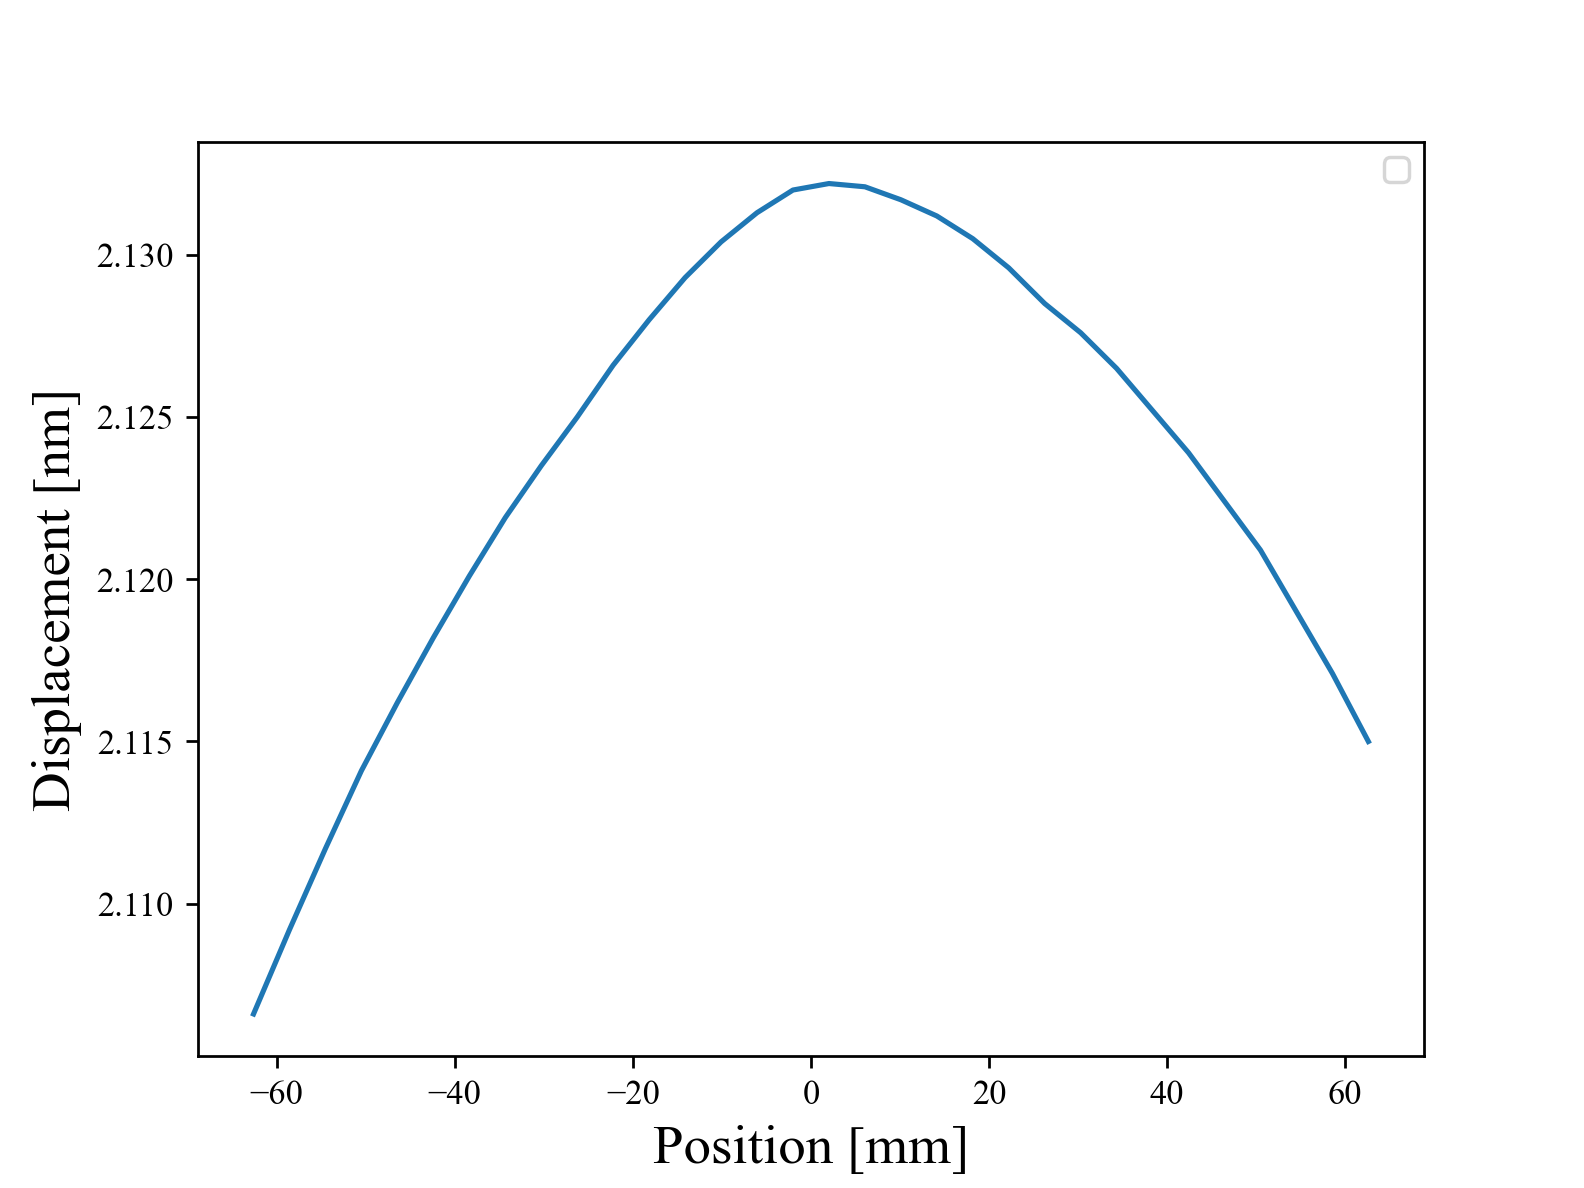

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.007107180980133775, 0.3714959181489893]


<IPython.core.display.Javascript object>


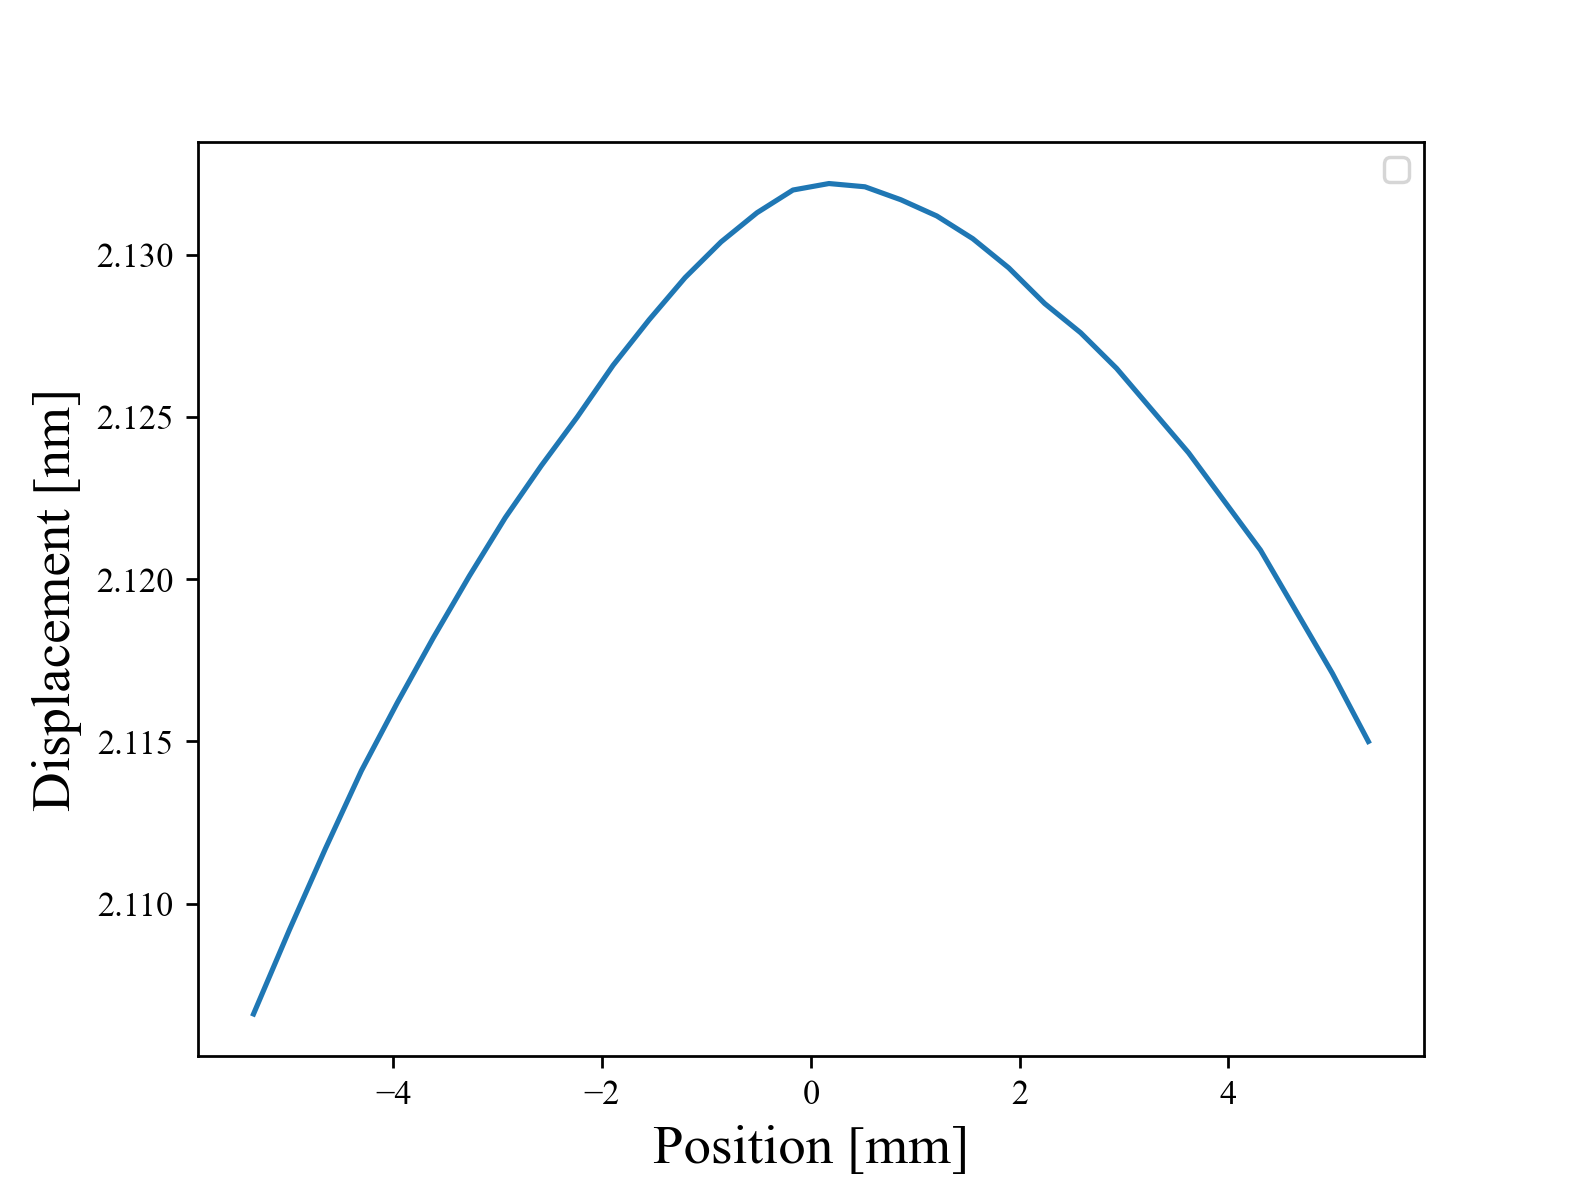

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.007107180980133775, 4.354989602270924]


<IPython.core.display.Javascript object>


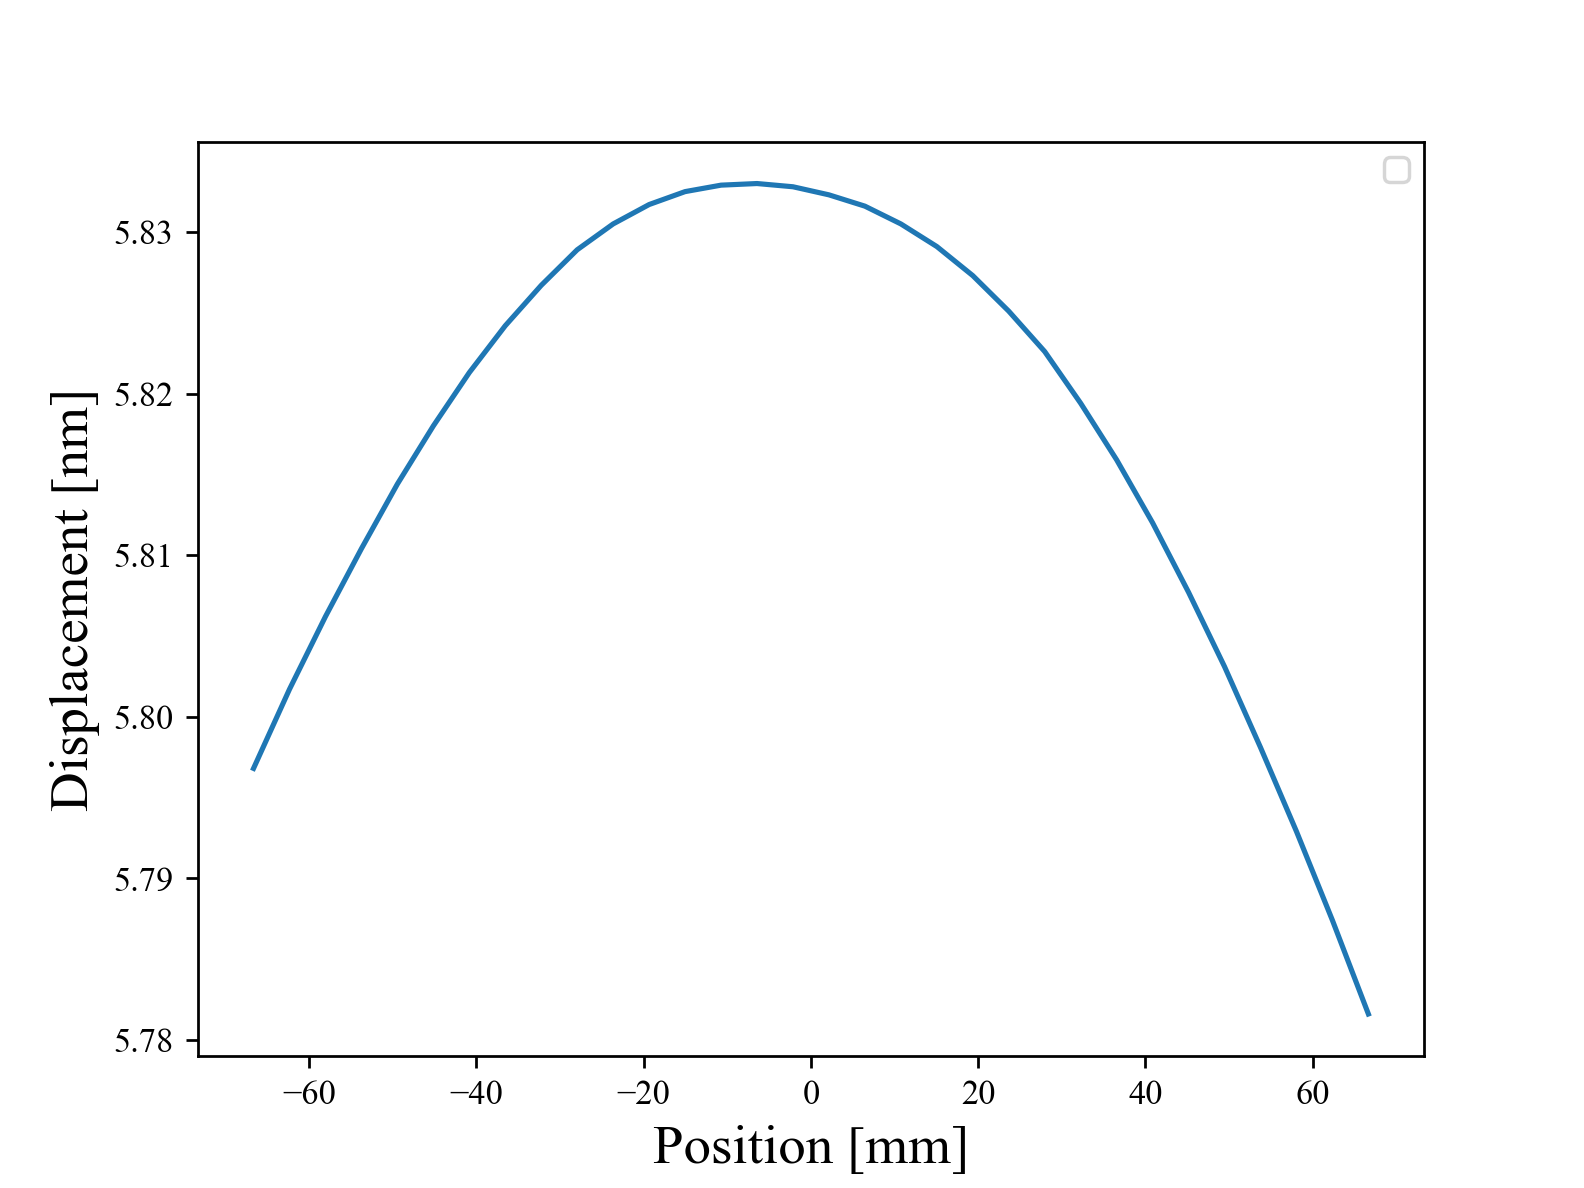

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.014646329264955802, 0.7588438825273508]


<IPython.core.display.Javascript object>


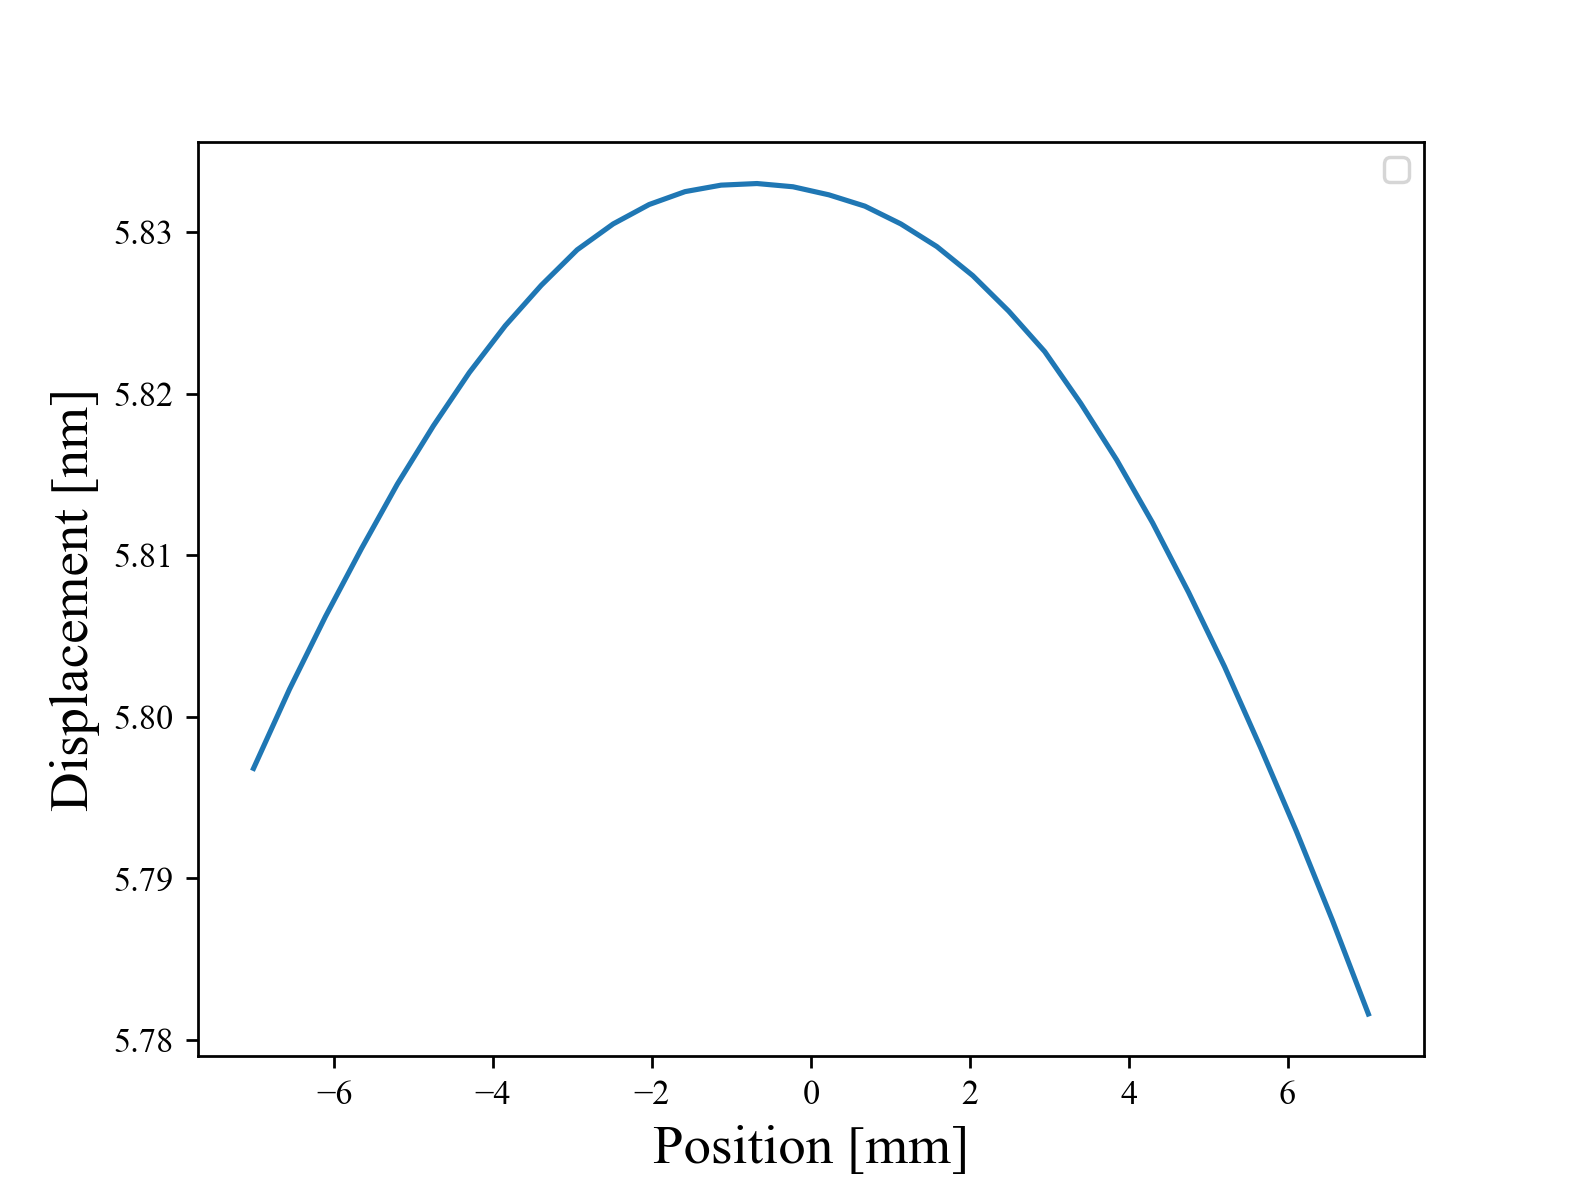

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.014646329264955802, 7.209198844361706]


<IPython.core.display.Javascript object>


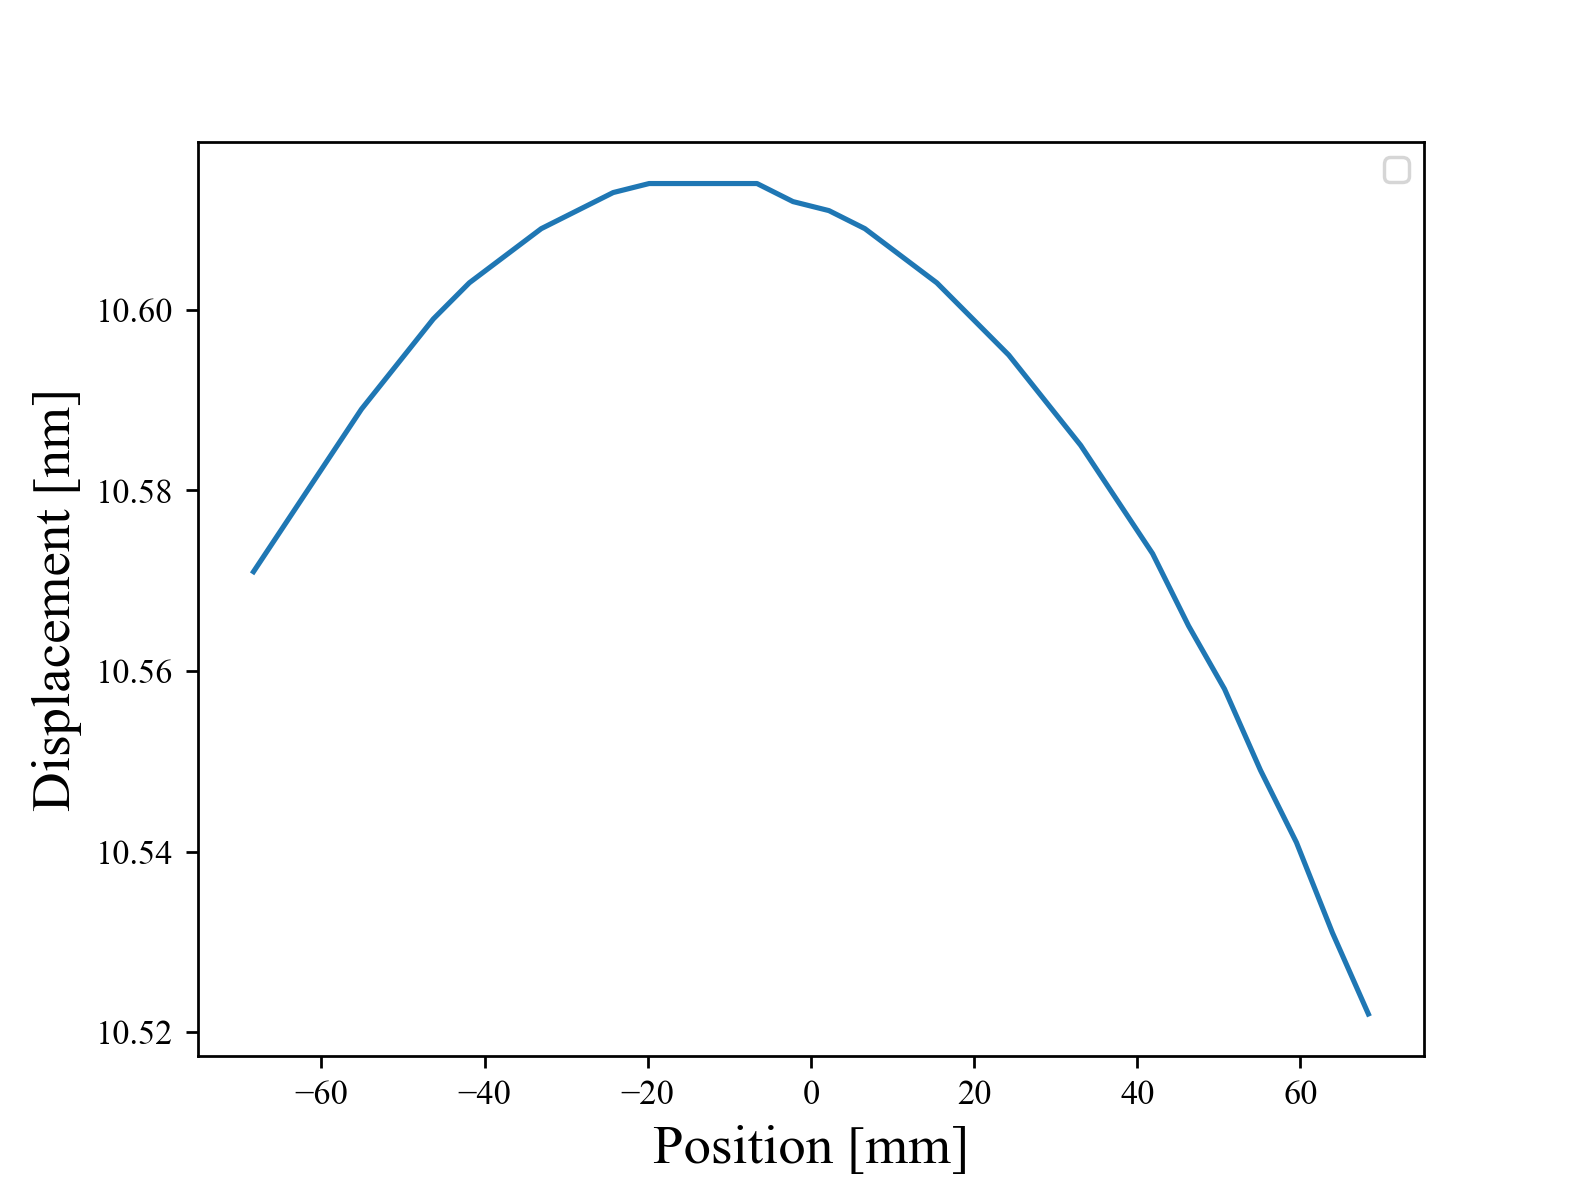

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.025478219098624307, 1.1111114205714914]


<IPython.core.display.Javascript object>


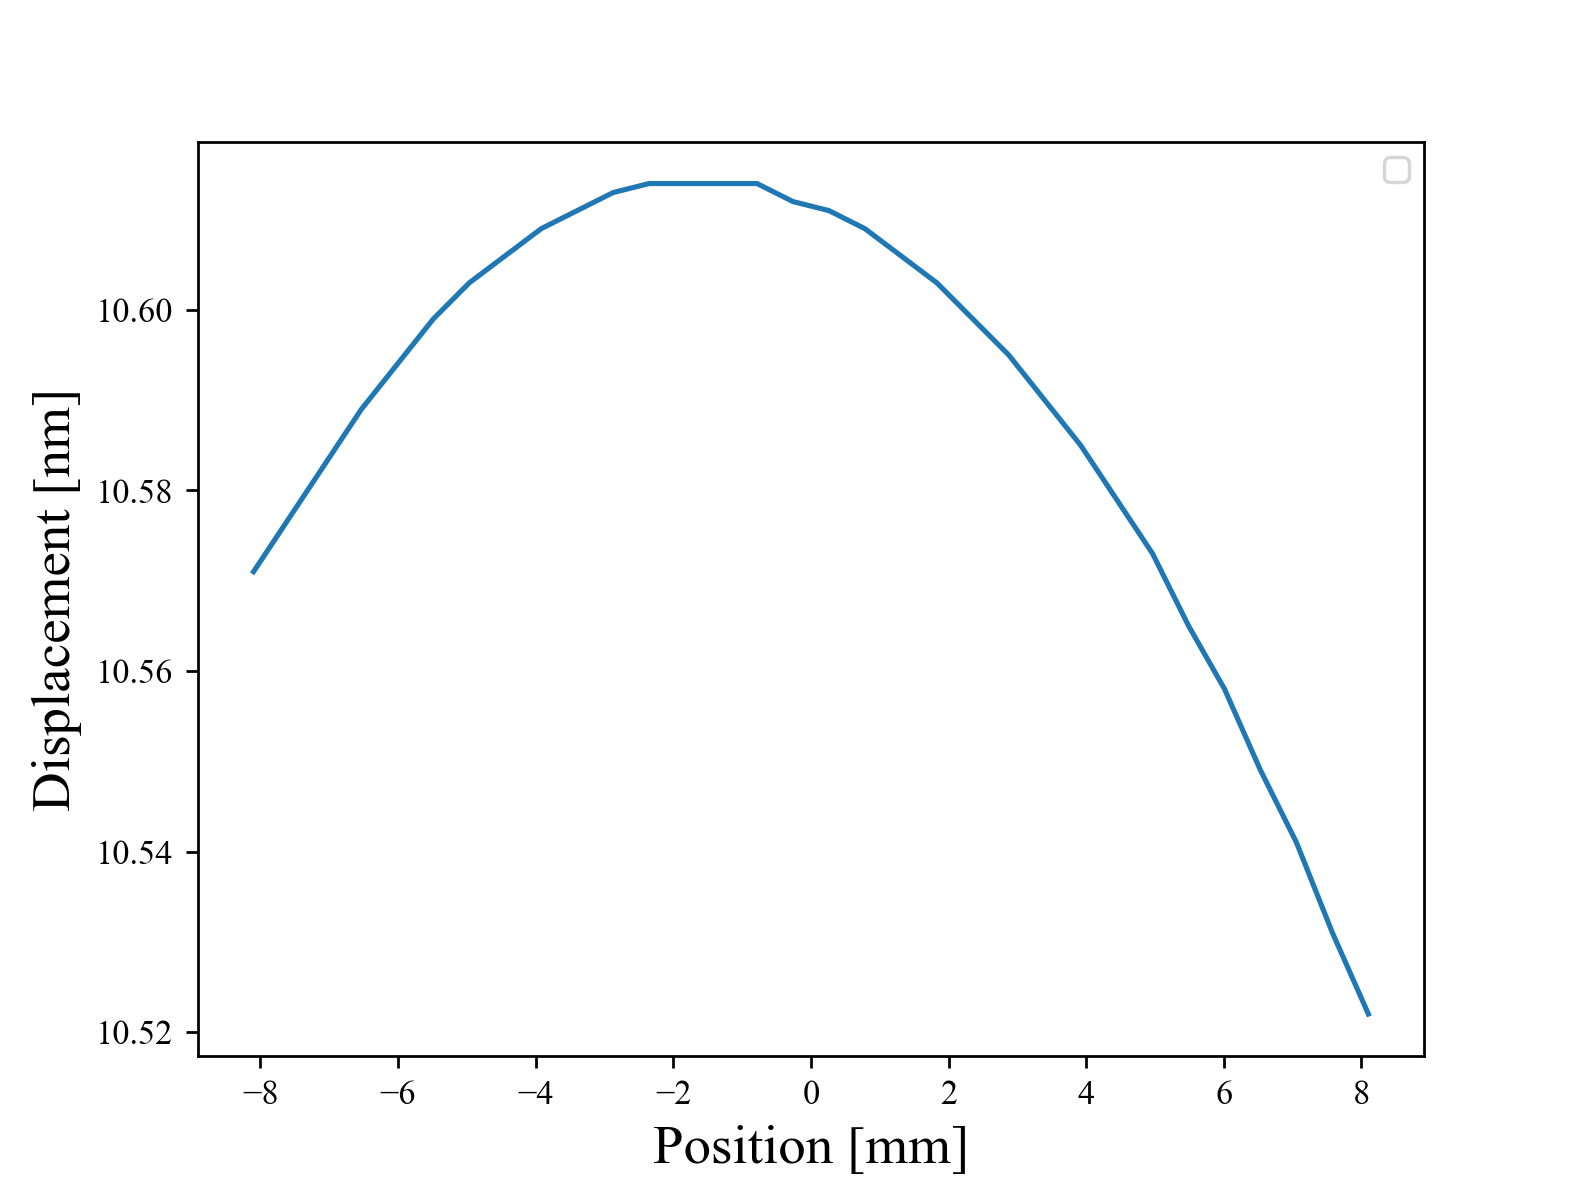

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.025478219098624307, 9.371744722647442]


<IPython.core.display.Javascript object>


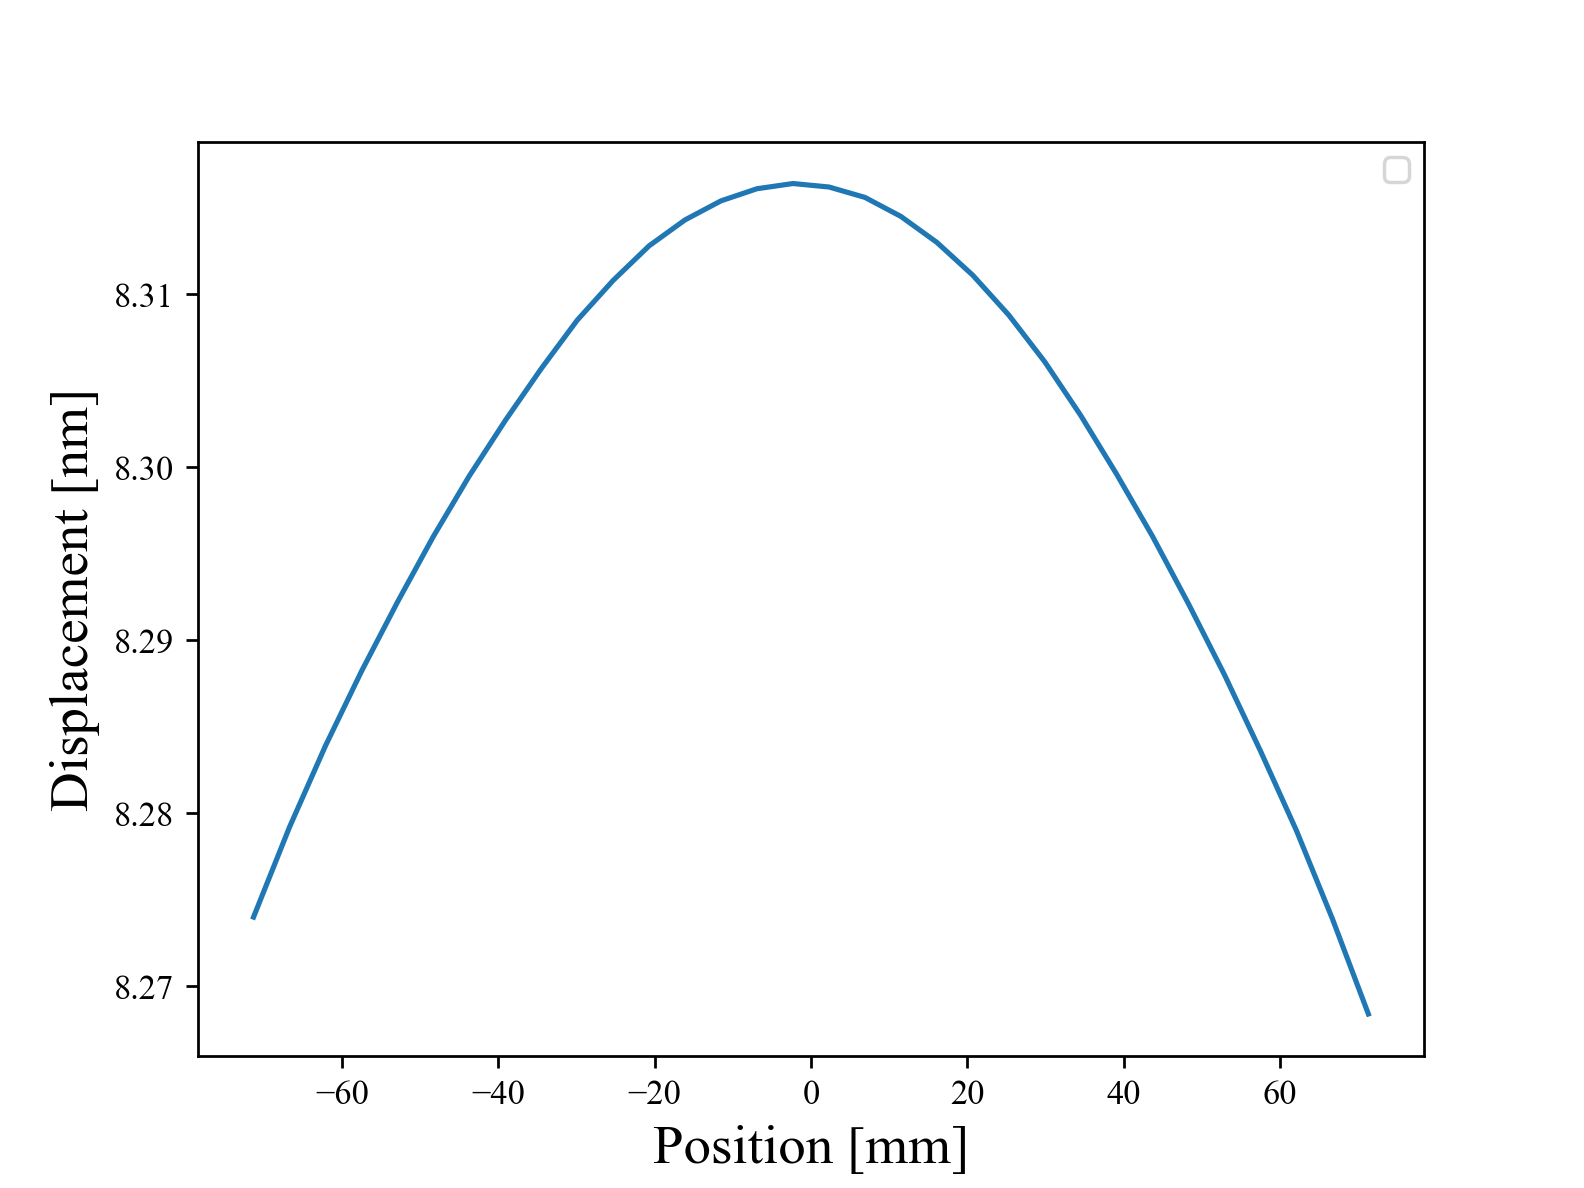

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.014451761084293654, 0.7121642065065056]


<IPython.core.display.Javascript object>


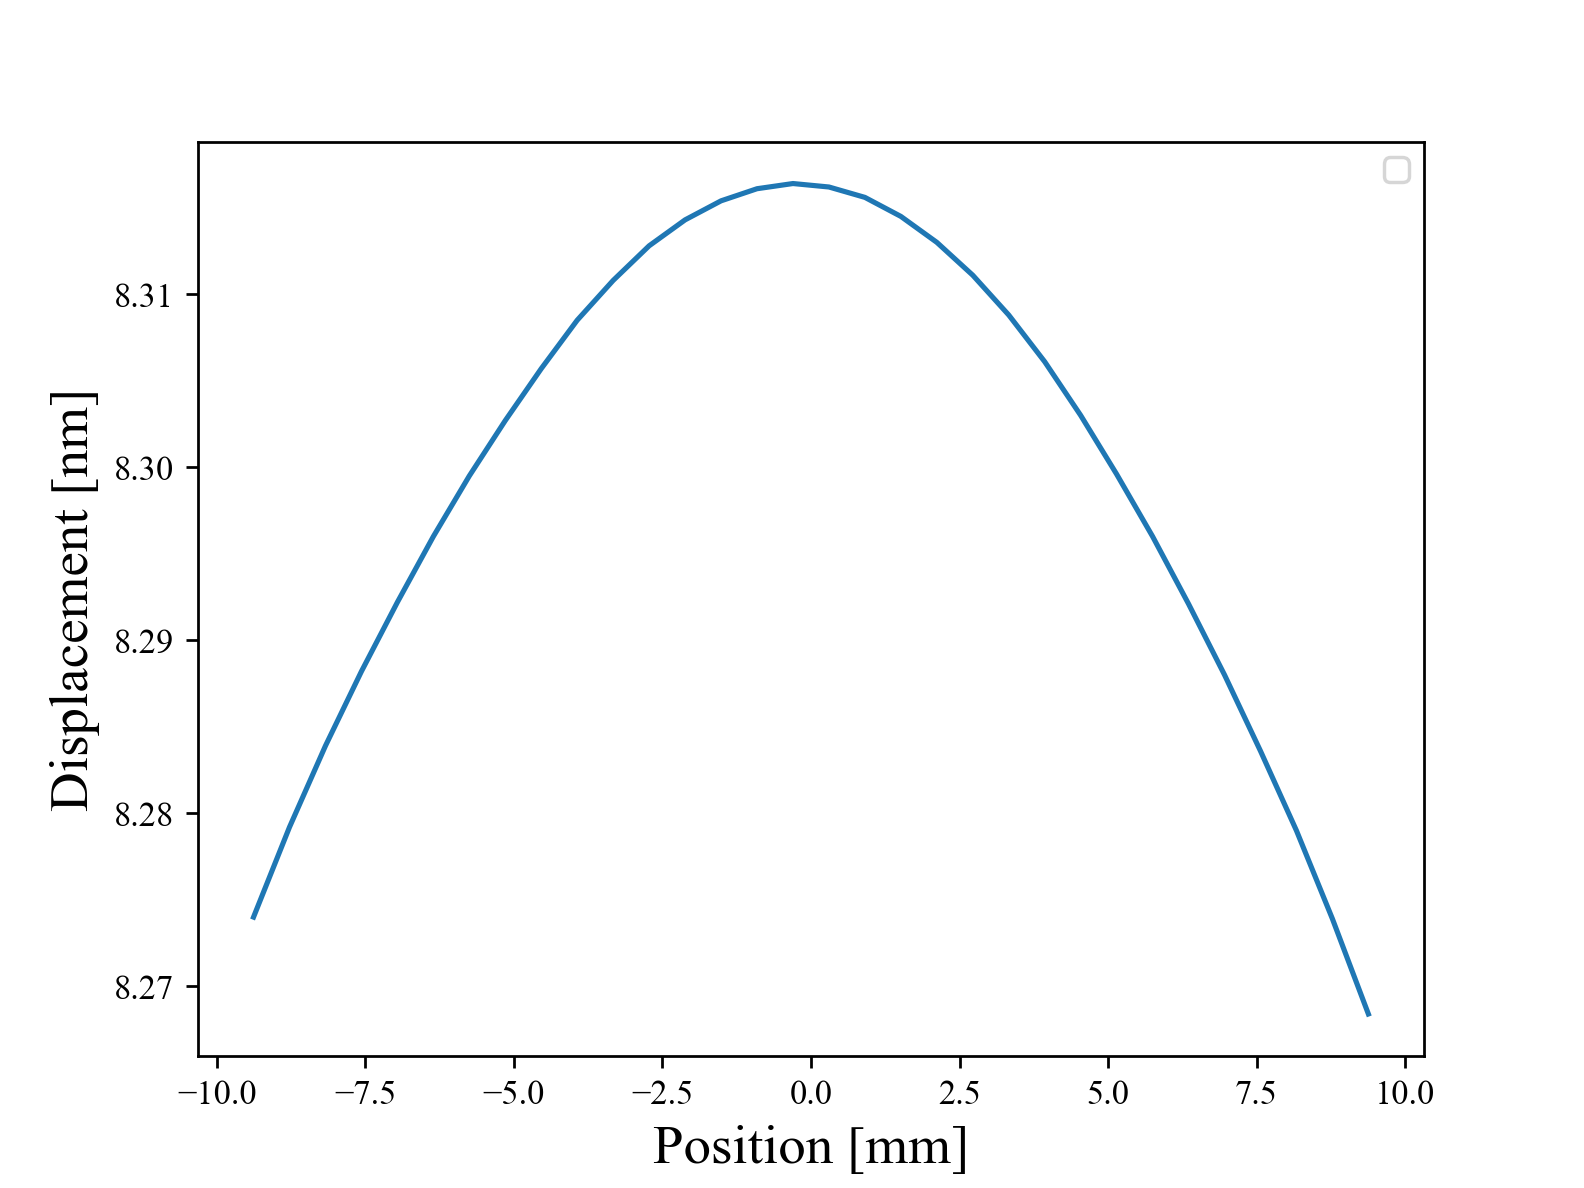

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.09, 0.014451761084293654, 5.413359053722159]


In [4]:
def read_30nm_def():
    data_ref = []
    data_rms = []
    with open(file_name + 'deformation_trans.csv', mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            data_float = []
            for i in row:
                data_float.append(float(i)*1e9)
            data_ref.append(np.array(data_float))
            data_rms.append(np.std(data_ref[-1]))
            
    data = []
    with open(file_name + 'GeometryParameters.dat', mode='r') as file:
        for line in file:
            data_cache = []
            values = line.strip().split(' ')
            data_cache.append(float(values[-15]))
            data_cache.append(float(values[-14]))
            data_cache.append(float(values[-13]))
            data.append(data_cache)
            
    return np.array(data_ref), np.array(data_rms), data

def read_30nm_Ydef():
    data_ref = []
    data_rms = []
    with open(file_name + 'deformation_trans_Y.csv', mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            data_float = []
            for i in row:
                data_float.append(float(i)*1e9)
            data_ref.append(np.array(data_float))
            data_rms.append(np.std(data_ref[-1]))
            
    data = []
    with open(file_name + 'GeometryParameters.dat', mode='r') as file:
        for line in file:
            data_cache = []
            values = line.strip().split(' ')
            data_cache.append(float(values[-15]))
            data_cache.append(float(values[-14]))
            data_cache.append(float(values[-13]))
            data.append(data_cache)
            
    return np.array(data_ref), np.array(data_rms), data

base_path = 'out/def_cache/G1a/10k/'
#paths = ['5nm/', '6.75nm/', '10nm/', '13.5nm/', '19.9nm/', '25nm/', '30nm/']
paths = ['high/']
file_names = [base_path + path for path in paths]

pathnm = np.array([[0.0414,0.045,0.0484,0.04996,0.05276,0.0344,0.03818],[0.00422,0.00534,0.007016665,0.0081,0.00938,0.00248,0.003196667]])*1e3
pathnm = np.array([[0.0486,0.0536,0.05798,0.0626,0.06666,0.06832,0.0713],[0.00248,0.003196667,0.00422,0.00534,0.007016665,0.0081,0.00938]])*1e3
pathnm = np.array([[0.0494,0.05408,0.05832,0.06298,0.0668,0.0686,0.07146665],[0.00248,0.003196667,0.00422,0.00534,0.007016665,0.0081,0.00938]])*1e3 #G1b
mu = np.array([-0.055, -0.029, -0.002, 0.015, 0.039, 0.049, 0.055])*1e3
mu = np.array([0,0,0,0,0,0,0])*1e3
name = ['5','6.75','10','13.5','19.9','25','30']
idd = 0

file_name = file_names[idd]
data_ref, data_rms, data = read_30nm_def()
for idd in range(7):
#idd = 6

    x_lim = pathnm[0][idd]
    index = idd
    plt.figure(dpi = 150)

    data1 = data_ref[index]
    x = np.linspace(-x_lim+mu[idd],x_lim+mu[idd],len(data1))
    plt.plot(x,data1)

    x = np.linspace((-x_lim+mu[idd])*1e6,(x_lim+mu[idd])*1e6,len(data1))
    slopes = np.arctan(np.diff(data1) / np.diff(x))
    rms_slope = np.std(slopes)*1e9
    print([data[index][0], np.std(data1), rms_slope ])

    plt.legend(loc='upper right', prop={'size': 9})
    plt.ylabel('Displacement [nm]', fontproperties=times_new_roman, fontsize=16)
    plt.xlabel('Position [mm]', fontproperties=times_new_roman, fontsize=16)
    plt.savefig("out/picture/G1a/10k/def/"+name[idd]+"EEHG_Y "+str("{:.3f}".format(np.std(data1)))+" "+"{:.3f}".format(rms_slope)+".png",bbox_inches="tight")

    #file_name = file_names[idd]
    x_lim = pathnm[1][idd]
    data_ref, data_rms, data = read_30nm_Ydef()

    plt.figure(dpi = 150)

    data1 = data_ref[index]
    x = np.linspace(-x_lim,x_lim,len(data1))
    plt.plot(x,data1)

    x = np.linspace(-x_lim*1e6,x_lim*1e6,len(data1))
    slopes = np.arctan(np.diff(data1) / np.diff(x))
    rms_slope = np.std(slopes)*1e9
    print([data[index][0], np.std(data1), rms_slope ])

    plt.legend(loc='upper right', prop={'size': 9})
    plt.ylabel('Displacement [nm]', fontproperties=times_new_roman, fontsize=16)
    plt.xlabel('Position [mm]', fontproperties=times_new_roman, fontsize=16)
    plt.savefig("out/picture/G1a/10k/def/"+name[idd]+"EEHG_S "+"{:.3f}".format(np.std(data1))+" "+"{:.3f}".format(rms_slope)+".png",bbox_inches="tight")


In [65]:
wave

['5', '6.75', '10', '13.5', '19.9', '25', '30']

<IPython.core.display.Javascript object>


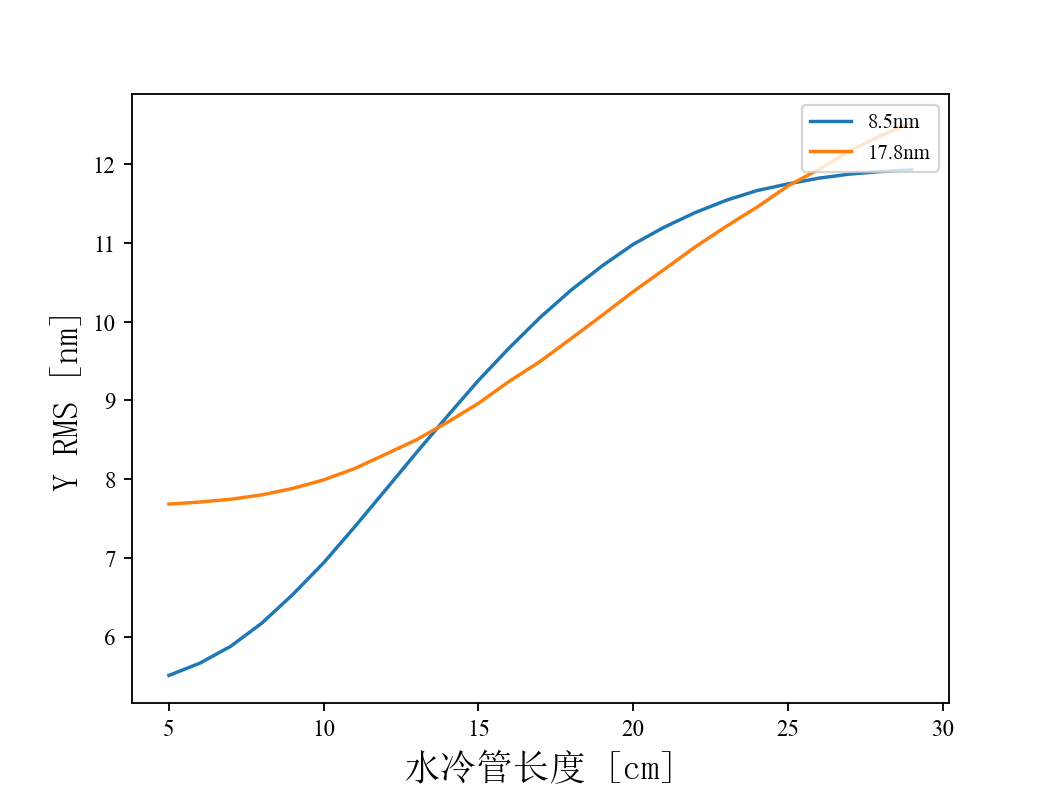

Text(0.5, 0, '水冷管长度 [cm]')

In [98]:
geometry_path, heat_flux_path, material_path, thermal_script_path, geometry_script_path, stur_script_path = rw.get_all_path(cwd)

mirror_name = "KB1-v EEHG taper"
frequency = "100k"
# 读取Excel文件
file_path =os.path.join(cwd,"Files","Heatload - 副本","heat",mirror_name+".xlsx")
flux_file_data = pd.read_excel(file_path)
flux_data = np.array(flux_file_data.values.astype(float).tolist())
flux_data[0]=np.array(flux_data[0])/6*4/2/1000
flux_data[1]=np.array(flux_data[1])/6*4/2/1000
wavelength = list(map(str, flux_file_data.columns.tolist()))

base_path = os.path.join(cwd,"out","def_cache",mirror_name,frequency)
paths = os.listdir(base_path)
wave = [i[:-2] for i in paths]
position = [float(item) for item in wave]
wave = [wave[i] for i in sorted(range(len(position)), key=lambda x: position[x])]
paths = [i+"nm" for i in wave]
file_names = [base_path + "\\" + path for path in paths ]

mu = [0]*len(flux_data[0])
if len(flux_data) == 4:
    mu = flux_data[-1]/1000
    
gp_values = rw.get_geomtry_values(geometry_path)
l2 = float(gp_values[0][1])/2
b2 = float(gp_values[0][2])/2
l2=0.3

rms = [[]]*len(file_names)
for i in range(len(file_names)):
    file_name = file_names[i]
    data_ref, data_rms, data,  x = read_30nm_def(file_name)
    x = np.array(x) - l2
    rms_cache = []
    for j in range(len(data_ref)):
        data1 = Deformation_to_dat(data_ref[j])
        y, y1 = polyfit_2rd(x, data1*1e-9)    
        min_id,max_id = get_lim_index(x, flux_data[0][i], mu[i])
        data2 = y[min_id:max_id]-y1[min_id:max_id]
        data2 = y[min_id:max_id]
        x2 = x[min_id:max_id]

        slopes = np.arctan(np.diff(data2) / np.diff(x2))
        rms_slope = np.std(slopes)*1e9
        rms_cache.append([data[j][0], np.std(data2)*1e9, rms_slope ])
    rms[i] = rms_cache

rms_cache = [[]]*len(file_names)
for i in range(len(file_names)):
    arr1 = np.array(rms[i])[:,0]
    arr = np.array(rms[i])
    sorted_indices = np.argsort(arr1)
    rms_cache[i] = [arr[i] for i in sorted_indices]
rms = np.array(rms_cache)

ii = 1
plt.figure(dpi = 100)
for i in range(len(file_names)):
    plt.plot(rms[i][:,0]*100,rms[i][:,ii], label=paths[i])
    #plt.plot(rms2[i][:,0]*100,rms2[i][:,ii], label=paths[i])
plt.legend(loc='upper right', prop={'size': 9})
plt.ylabel('Y RMS [nm]', fontproperties=simsun, fontsize=16)
plt.xlabel('水冷管长度 [cm]', fontproperties=simsun, fontsize=16)
#plt.savefig("out/picture/G1a/100k/cu length vs Y rms.png",bbox_inches="tight")



<IPython.core.display.Javascript object>


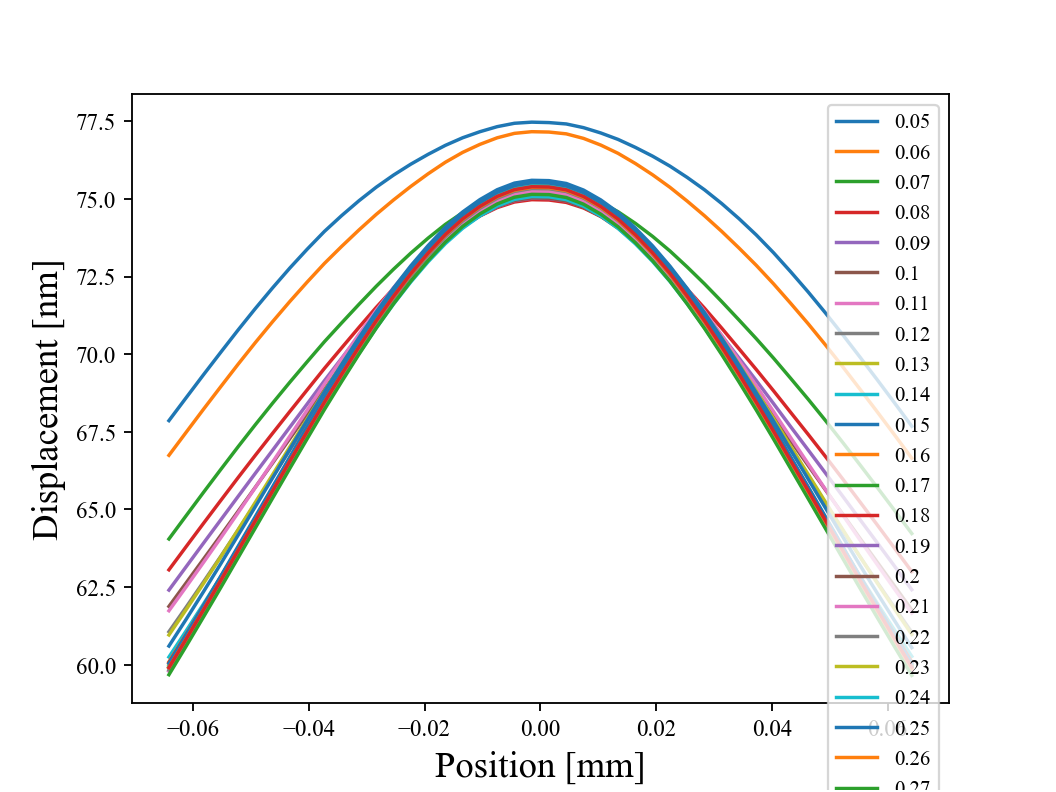

1 0.05 3.068856846619166 169.55611727396132
2 0.06 3.3142793462094815 178.21618257615447
3 0.07 3.57740055124233 188.401831777945
4 0.08 3.8385877972060913 199.2420989806865
5 0.09 4.083839360392083 209.95784556000828
6 0.1 4.300551142125049 219.93057826479216
7 0.11 4.48217546583222 228.8140518654504
8 0.12 4.63419976398076 236.74297552580958
9 0.13 4.74817390230268 243.00291021521653
10 0.14 4.833898001664482 247.92740306626007
11 0.15 4.895602973344958 251.59025208460434
12 0.16 4.938454365711073 254.1922967246167
13 0.17 4.966481759990072 255.91225245285148
14 0.18 4.988608443233112 257.2758818906198
15 0.19 5.000500511054241 258.02389855803796
16 0.2 5.012492040141248 258.7410292008734
17 0.21 5.016437736435395 259.0252024963218
18 0.22 5.0227014912439945 259.379438093483
19 0.23 5.024445704801264 259.50329449413493
20 0.24 5.0294894970288135 259.79533175776453
21 0.25 5.029308840663171 259.80532558040136
22 0.26 5.028504794929004 259.7502375080242
23 0.27 5.02850816456071 259.769

<IPython.core.display.Javascript object>


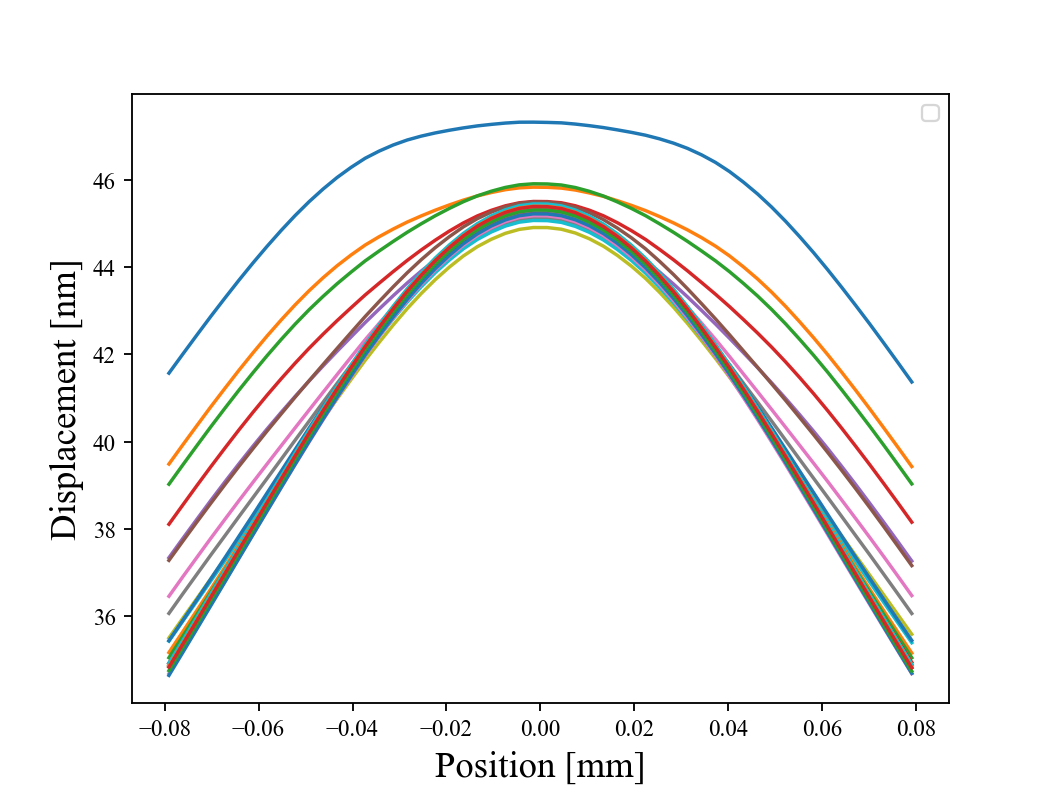

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 0.05 1.8412702846062377 90.61474497775855
2 0.06 1.9776869981940495 93.42782506465998
3 0.07 2.130602344119013 97.21314118285045
4 0.08 2.295735464741979 101.84890568300146
5 0.09 2.4621304681198133 106.93777519598261
6 0.1 2.623456276368868 112.18601577851717
7 0.11 2.7802957812693787 117.69471028023746
8 0.12 2.9144446202397547 122.59411643609374
9 0.13 3.025557149940867 126.85491220627391
10 0.14 3.125650123430565 131.03757102689298
11 0.15 3.1986721585442863 134.2694842290576
12 0.16 3.2601609878450275 137.1452370277262
13 0.17 3.3035727021548196 139.31184394295724
14 0.18 3.329977970747749 140.7139004037849
15 0.19 3.352683866503158 141.88761948110147
16 0.2 3.367076878199205 142.67366662000668
17 0.21 3.3779355839518086 143.22565800918207
18 0.22 3.3850231339363037 143.59560609798731
19 0.23 3.392031262240843 143.98050562655163
20 0.24 3.3916501122941574 143.94803545310697
21 0.25 3.3948688516985746 144.12628193674774
22 0.26 3.3961484502736767 144.22166052293827
23 0.27 3.3971

<IPython.core.display.Javascript object>


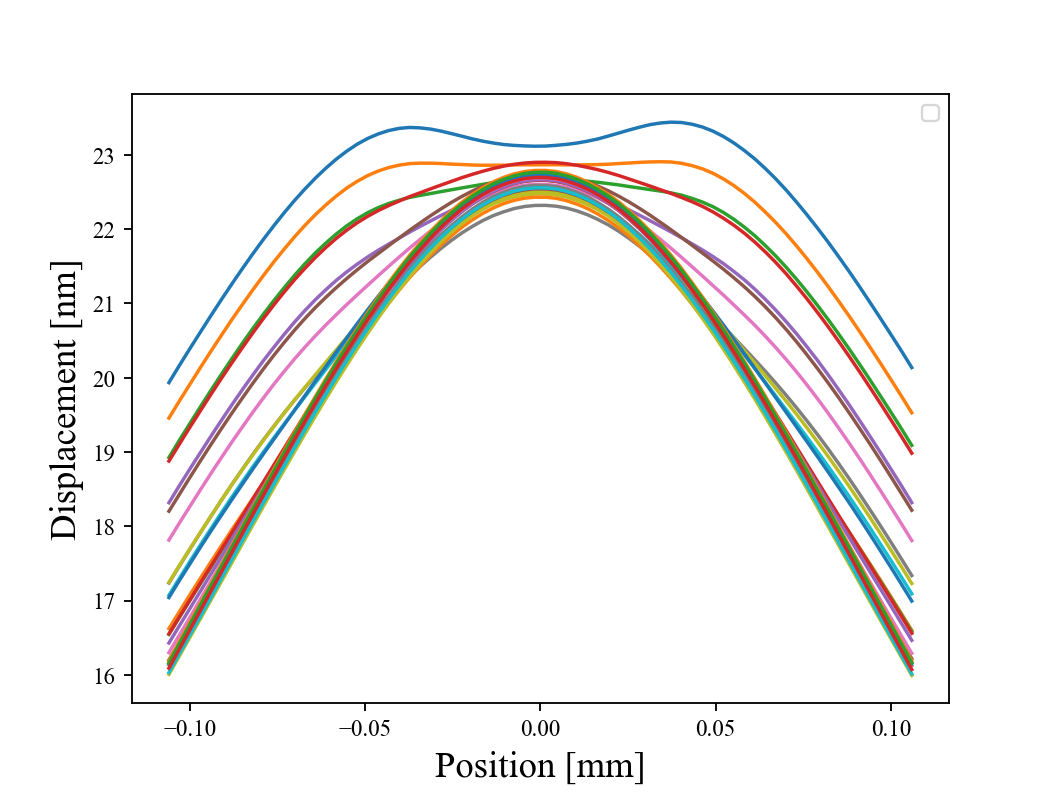

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 0.05 1.0236650656668265 43.79483216074729
2 0.06 1.0683602569807558 43.6320877426448
3 0.07 1.1298518708220122 43.981388349147885
4 0.08 1.2030919347709066 44.84720655330269
5 0.09 1.2859487595512347 46.22695387150051
6 0.1 1.374782111524102 47.83137878744147
7 0.11 1.4638238067311171 49.62382356476435
8 0.12 1.5525518747794458 51.537791197061374
9 0.13 1.6307238932127848 53.31194349344165
10 0.14 1.715586442706893 55.38495067127043
11 0.15 1.7861269304963008 57.21728398018054
12 0.16 1.8524658189395846 58.98872374665124
13 0.17 1.9097891721597877 60.63260503380225
14 0.18 1.9556417424485237 62.04744613100282
15 0.19 1.992859574133237 63.28918188491455
16 0.2 2.021187042737113 64.28027497297819
17 0.21 2.0483386265112578 65.27009458175539
18 0.22 2.0637987672394202 65.97843997421387
19 0.23 2.0743391346368876 66.43198562530242
20 0.24 2.084531151905361 66.86159317053638
21 0.25 2.0946837573270765 67.31206282429407
22 0.26 2.102500013211785 67.59228169266349
23 0.27 2.1025226006550874

<IPython.core.display.Javascript object>


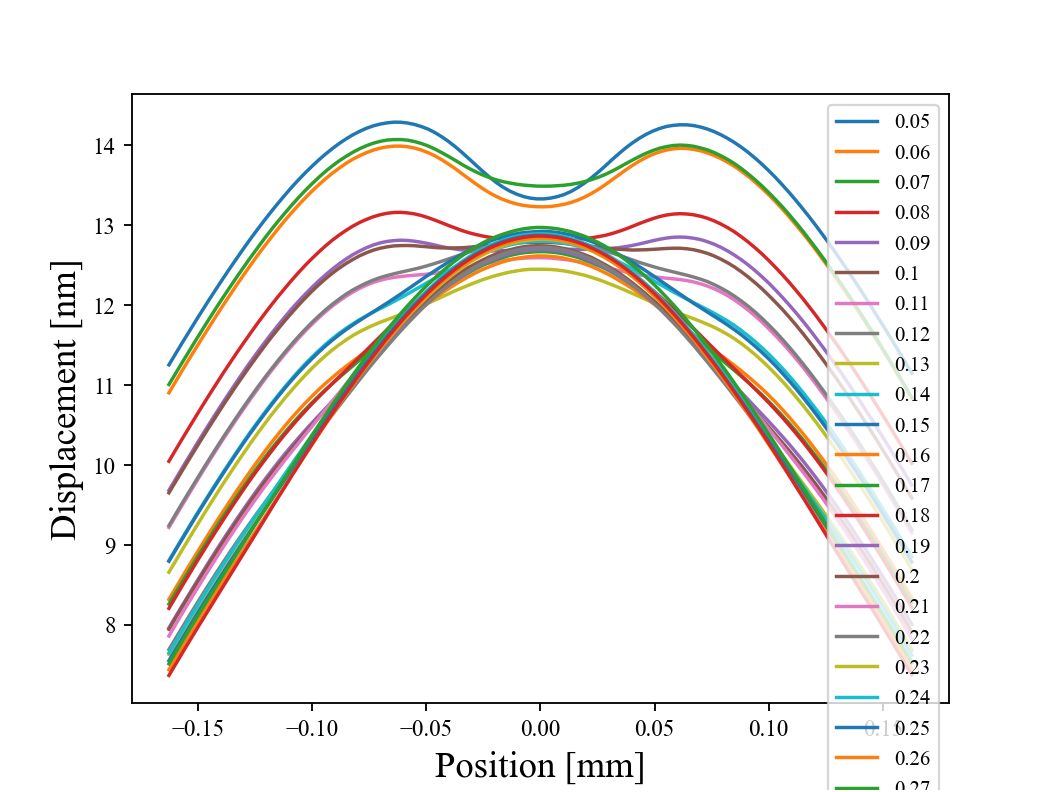

1 0.05 0.8599636206508826 28.476564672735293
2 0.06 0.8762283008006345 28.008264876729346
3 0.07 0.8899194292158521 27.461200799523954
4 0.08 0.9096612927007593 27.055437979568524
5 0.09 0.9350565537097408 26.780747017468453
6 0.1 0.963486829682638 26.662636408496702
7 0.11 1.0158696864471097 26.99595073899376
8 0.12 1.0647140179118602 27.34576284720713
9 0.13 1.1091923673250874 27.63501467424904
10 0.14 1.1676163515261508 28.19142984308195
11 0.15 1.2198989751303047 28.751321566319657
12 0.16 1.273232992684501 29.39509391115579
13 0.17 1.3182611261333546 29.837683482082667
14 0.18 1.3952094757801108 31.038855344365132
15 0.19 1.4358397883175207 31.533887271446144
16 0.2 1.4771291789377874 32.11868040770328
17 0.21 1.5427078823080984 33.24741083632256
18 0.22 1.565871564929431 33.4582036140703
19 0.23 1.6141311497874173 34.320004778118935
20 0.24 1.6488592475651134 34.94961034439282
21 0.25 1.6792419897352746 35.469025544568034
22 0.26 1.7032082320539563 35.919313700109036
23 0.27 1.72

<IPython.core.display.Javascript object>


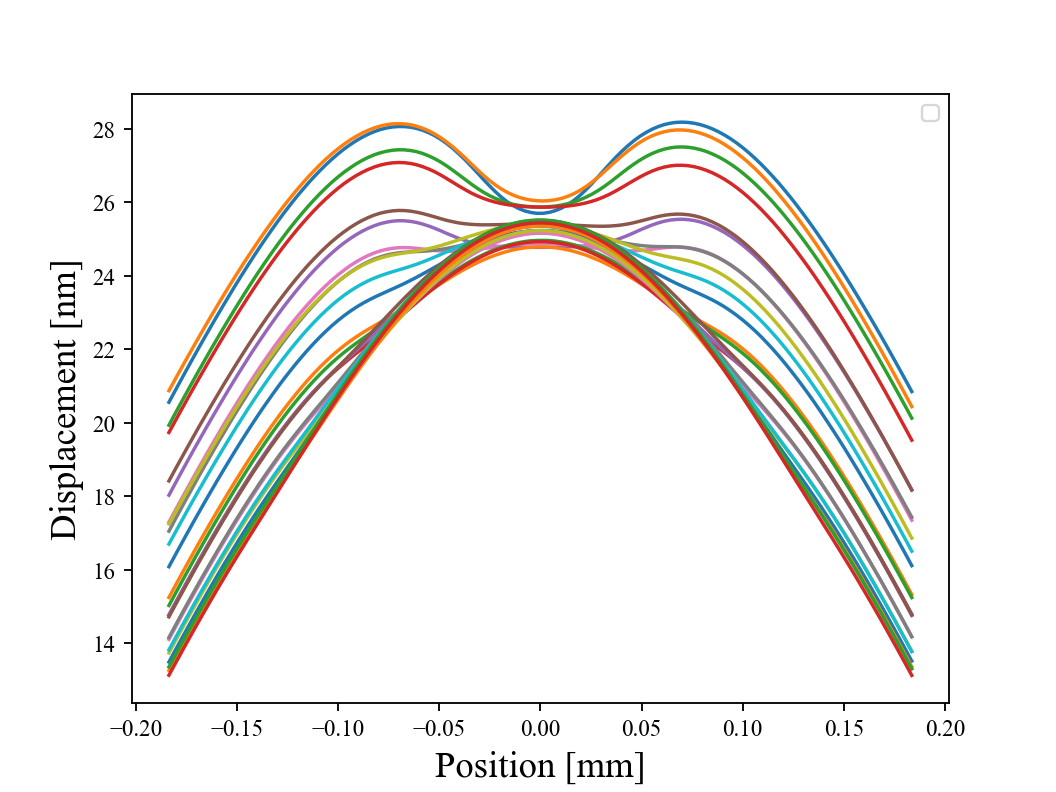

1 0.05 2.078441818279864 61.4044607767216
2 0.06 2.0798926792582475 59.798816147976524
3 0.07 2.1049495252623487 58.79618277474706
4 0.08 2.1240677033502746 57.6509832827304
5 0.09 2.164218580577325 56.90683938834948
6 0.1 2.225526082680908 56.61275709355721
7 0.11 2.294893440650613 56.58138181717865
8 0.12 2.3812200396459033 56.68251576415733
9 0.13 2.466091046604541 56.92863554933548
10 0.14 2.5623560882281393 57.57011682375083
11 0.15 2.6738758765336774 58.49214138079741
12 0.16 2.788933158874952 59.55875444401476
13 0.17 2.898861481128685 60.579607445638295
14 0.18 3.012921758292454 61.8187749207175
15 0.19 3.1262421163485117 63.067322168913535
16 0.2 3.2388792350049744 64.42194849257965
17 0.21 3.339066153820791 65.60815543141014
18 0.22 3.4413797820598715 66.9353134365719
19 0.23 3.521825550937794 67.95650934845958
20 0.24 3.612545212820487 69.17133866712476
21 0.25 3.688159096064731 70.27745859328583
22 0.26 3.7551033250484336 71.20960092439633
23 0.27 3.8127286031666063 72.0599

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<IPython.core.display.Javascript object>


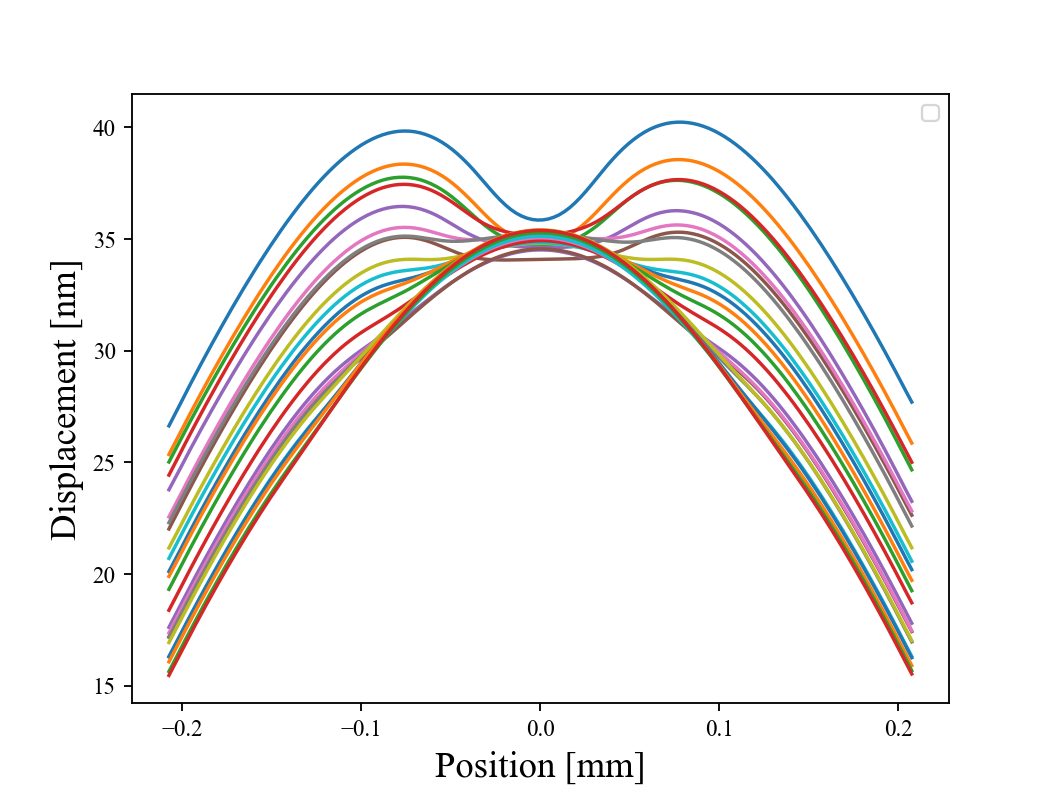

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 0.05 3.623368326345991 93.92422203641367
2 0.06 3.612786689386769 91.86344522205508
3 0.07 3.6299252360322347 90.13072056895646
4 0.08 3.6548071733593246 88.59721899173985
5 0.09 3.7062183932575277 87.46296154119378
6 0.1 3.7742681165035292 86.67601480686322
7 0.11 3.8594918856645113 86.29571689648687
8 0.12 3.9485878176990865 85.99629062734606
9 0.13 4.070273050310217 86.31523075020183
10 0.14 4.18738744990994 86.53630220085526
11 0.15 4.34604487619115 87.57194039842094
12 0.16 4.496097374498176 88.52244147922117
13 0.17 4.649764144089812 89.65815818771274
14 0.18 4.80447238740921 90.82411629891065
15 0.19 4.947397329760407 91.95781237604729
16 0.2 5.10745235135655 93.36233017908961
17 0.21 5.248628876425631 94.71378948463828
18 0.22 5.4206901812049955 96.5285711297421
19 0.23 5.549924680239052 97.80215153364999
20 0.24 5.702576317855764 99.5837284296315
21 0.25 5.801296427611712 100.55267291340964
22 0.26 5.939971577355898 102.2315487329169
23 0.27 6.033893308276446 103.32065294004

<IPython.core.display.Javascript object>


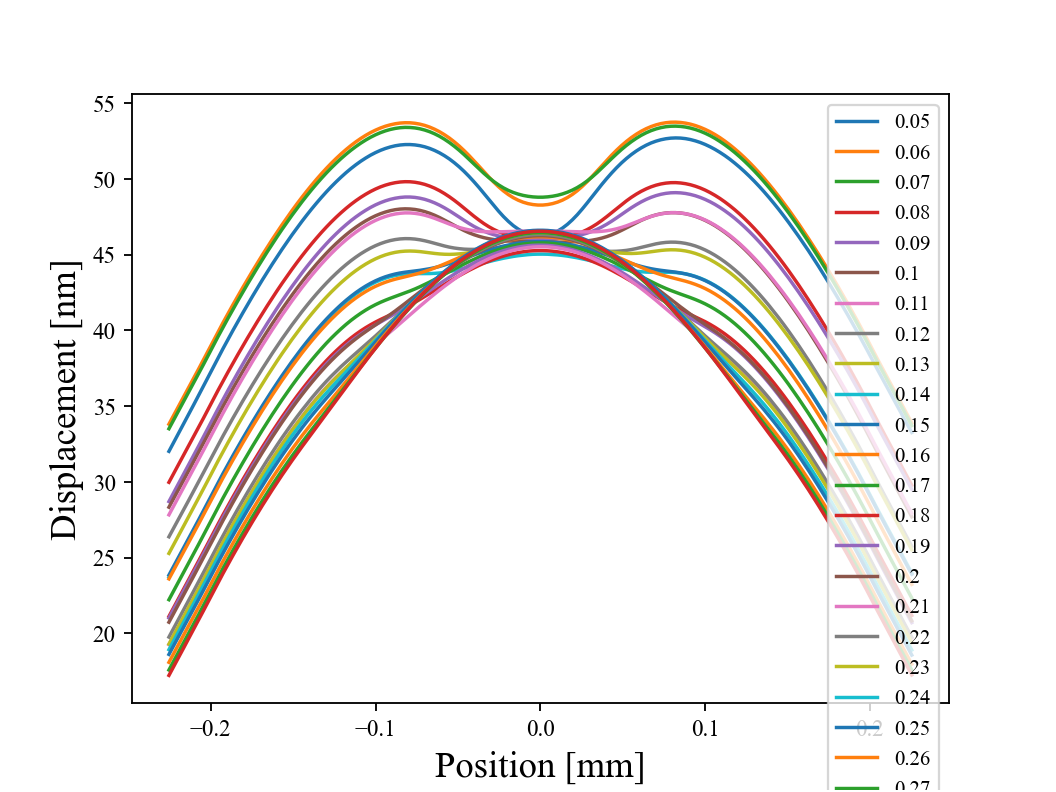

1 0.05 5.649210778830048 131.7853297106568
2 0.06 5.6562436903593465 129.44880123286117
3 0.07 5.662409452562992 127.03884496368819
4 0.08 5.726731005756448 125.463811449817
5 0.09 5.764761762750245 123.51689473914453
6 0.1 5.851935197707827 122.53823064713018
7 0.11 5.94544598336708 121.67116503971282
8 0.12 6.062354418130237 121.19880381346418
9 0.13 6.194116743490913 121.04749818733362
10 0.14 6.359758897530728 121.46165481915293
11 0.15 6.536173329127037 122.0786888861142
12 0.16 6.730933694320113 123.03163529149026
13 0.17 6.927312415471784 124.24185662915954
14 0.18 7.1043732627303635 125.1922263326736
15 0.19 7.307037338660966 126.53415168375344
16 0.2 7.5373682008547425 128.5599376321447
17 0.21 7.739792921816588 130.17227510434154
18 0.22 7.93260164600897 131.7780037932011
19 0.23 8.12831507344102 133.5160076337232
20 0.24 8.332662245355822 135.5094083582125
21 0.25 8.487986747656558 136.8157235016742
22 0.26 8.65603265781129 138.46219706458444
23 0.27 8.824765712207109 140.33

In [99]:
cwd = os.getcwd()
mirror_name = "KB1-v EEHG"
frequency = "100k"
# 读取Excel文件
file_path =os.path.join(cwd,"Files","Heatload - 副本","heat",mirror_name+".xlsx")
flux_file_data = pd.read_excel(file_path)
flux_data = np.array(flux_file_data.values.astype(float).tolist())
flux_data[0]=np.array(flux_data[0])/6*4/2/1000
flux_data[1]=np.array(flux_data[1])/6*4/2/1000
wavelength = list(map(str, flux_file_data.columns.tolist()))

base_path = os.path.join(cwd,"out","def_cache",mirror_name,frequency)
paths = os.listdir(base_path)
wave = [i[:-2] for i in paths]
position = [float(item) for item in wave]
wave = [wave[i] for i in sorted(range(len(position)), key=lambda x: position[x])]
paths = [i+"nm" for i in wave]
file_names = [base_path + "\\" + path for path in paths ]

mu = [0]*len(flux_data[0])
if len(flux_data) == 4:
    mu = flux_data[-1]/1000
    
gp_values = rw.get_geomtry_values(geometry_path)
l2 = float(gp_values[0][1])/2
b2 = float(gp_values[0][2])/2
l2=0.3


for i in range(len(file_names)):
#for i in range(3):
    file_name = file_names[i]
    data_ref, data_rms, data,  x = read_30nm_def(file_name)
    x = np.array(x) - l2
    rms_cache = []
    
    plt.figure(dpi = 100) 
    for j in range(len(data_ref)-1):
        data1 = Deformation_to_dat(data_ref[j])
        data1 = data_ref[j]
        y, y1 = polyfit_2rd(x, data1*1e-9)    
        min_id,max_id = get_lim_index(x, flux_data[0][i], mu[i])
        data2 = y[min_id:max_id]-y1[min_id:max_id]
        data2 = y[min_id:max_id]
        #data2 = Deformation_to_dat(data2)
        x2 = x[min_id:max_id]

        if i % 3 == 0:
            plt.plot(x2,data2*1e9, label=str(data[j][0]))
            #plt.plot(x,data1, label=str(i*1)+"mm")
        else:
            plt.plot(x2,data2*1e9)
            #plt.plot(x,data1*1e9, label=str(i*1)+"mm")
            

        #x = np.linspace((-x_lim+mu[idd])*1e6,(x_lim+mu[idd])*1e6,len(data1))

        slopes = np.arctan(np.diff(data2) / np.diff(x2))
        rms_slope = np.std(slopes)*1e9
        print(j+1, data[j][0], np.std(data2)*1e9, rms_slope)
    plt.legend(loc='upper right', prop={'size': 9}) 
    plt.ylabel('Displacement [nm]', fontproperties=times_new_roman, fontsize=16) 
    plt.xlabel('Position [mm]', fontproperties=times_new_roman, fontsize=16) 

In [22]:
output_dir = os.path.join(cwd, "out\\Ansys_out\\Thermal\\")  # 输出目录 (out 文件夹)
temperature_path= rw.get_files_from_folder(output_dir, "txt")
temperature_name = [os.path.basename(path) for path in temperature_path]
temperature_para = [re.findall(r'\d+\.\d+|\d+', name) for name in temperature_name]
gemo_single_num = sum(1 for para in temperature_para if int(para[0]) == 1)
temperature_path_reshape = np.reshape(temperature_path, (-1, gemo_single_num))
temperature_name_reshape = np.reshape(temperature_name, (-1, gemo_single_num))
temperature_para_reshape = np.reshape(temperature_para, (-1, gemo_single_num, 6))

In [23]:
temperature_para

[['1', '1', '1000', '0', '22.0', '02'],
 ['1', '1', '1500', '0', '22.0', '03'],
 ['1', '1', '2000', '0', '22.0', '04'],
 ['1', '1', '2500', '0', '22.0', '05'],
 ['1', '1', '3000', '0', '22.0', '06'],
 ['1', '1', '3500', '0', '22.0', '07'],
 ['1', '1', '4000', '0', '22.0', '08'],
 ['1', '1', '4500', '0', '22.0', '09'],
 ['1', '1', '5000', '0', '22.0', '10'],
 ['1', '1', '500', '0', '22.0', '01']]

In [90]:
     file_name = file_names[6]
    data_ref, data_rms, data,  x = read_30nm_def(file_name)
#     x = np.array(x) - l2
#     rms_cache = []
    
#     plt.figure(dpi = 100) 
#     for j in range(len(data_ref)-1):
#         data1 = Deformation_to_dat(data_ref[j])
#         data1 = data_ref[j]
#         y, y1 = polyfit_2rd(x, data1*1e-9)    
#         min_id,max_id = get_lim_index(x, flux_data[0][i], mu[i])
#         data2 = y[min_id:max_id]-y1[min_id:max_id]
#         data2 = y[min_id:max_id]

IndentationError: unexpected indent (641968685.py, line 2)

In [3]:
from pathlib import Path


WindowsPath('F:/XFEL/FEL4/FEA_Geom/../Files/Model')

In [12]:
rw.get_files_from_folder(Path.cwd()/'..'/ 'FEA_Geom'/ 'Files' / 'Model','pmdb')

['F:\\XFEL\\FEL4\\FEA_Geom\\..\\FEA_Geom\\Files\\Model\\M1_0.850_0.050_0.040_0.050_0.100_0.005_0.030_0.013_0.025_0.008.pmdb']

In [11]:
import itertools

cwd = os.path.dirname(os.getcwd())
temp_vals, conv_center_vals, conv_side_vals = rw.read_temp_conv()

geometry_path, heat_flux_path, material_path, thermal_script_path, geometry_script_path, stur_script_path = rw.get_all_path(cwd)
gemo_check, thermal_check = rw.cal_geometry()
heat, frequency, l3, b3, t3, OFHC_L_mid3, OFHC_L_side3, GAP_CU3, dw_length3, kong_height3, kong_length3, notch_depth3 = rw.read_ini_geom()
temp_num = (len(geometry_path)) * 1 * len(temp_vals) * len(conv_center_vals) * len(conv_side_vals)

# cwd = os.path.dirname(os.getcwd())
full_temp = set(range(1, temp_num+1))
output_dir = os.path.join(cwd, "out", "Ansys_out", "Thermal")  # 输出目录 (out 文件夹)
temperature_path= rw.get_files_from_folder(output_dir, "txt")
temperature_name = [os.path.basename(path) for path in temperature_path]
temp_number = []
for i in temperature_name:
    temp_number.append(int(re.search(r'(\d+).txt',i).group(1)))
temp_number = set(temp_number) 
cal_num = list(full_temp - temp_number)

count = 1
para_list = []
for num1, g in enumerate(geometry_path, start=1):  # num1 对应 geometry_path 中的文件
    for conv_center, conv_side, temp_center in itertools.product(conv_center_vals, conv_side_vals, temp_vals):
        if count in cal_num:
            para_list.append([num1, g, heat_flux_path[0], conv_center, conv_side, temp_center, count])
        count += 1

In [14]:
full_temp

{1, 2}

In [4]:
def read_ini_geom():
    file_path = "parameters.txt"
    geometry = []
    colling_type = []
    heat = []
    frequency = []
    l3 = [0,0,0]
    b3 = [0,0,0]
    t3 = [0,0,0]
    OFHC_L_mid3 = [0,0,0]
    OFHC_L_side3 = [0,0,0]
    GAP_CU3 = [0,0,0]
    dw_length3 = [0,0,0]
    kong_height3 = [0,0,0]
    kong_length3 = [0,0,0]
    notch_depth3 = [0,0,0]
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = [v for v in line.strip().split(' ') if v]
            if len(values) == 0: continue
            if values[0] == 'geometry:':
                geometry = values[1:]
            if values[0] == 'colling_type:':
                colling_type = values[1:]
            if values[0] == 'heat_flux:':
                heat = str(geometry) + " " + values[1:]
            if values[0] == 'frequency:':
                frequency = [values[1]]
            if values[0] == 'l:':
                read_ini_geom_value(l3, values)
            if values[0] == 'b:':
                read_ini_geom_value(b3, values)
            if values[0] == 't:':
                read_ini_geom_value(t3, values)
            if values[0] == 'OFHC_L_mid:':
                read_ini_geom_value(OFHC_L_mid3, values)
            if values[0] == 'OFHC_L_side:':
                read_ini_geom_value(OFHC_L_side3, values)
            if values[0] == 'GAP_CU:':
                read_ini_geom_value(GAP_CU3, values)
            if values[0] == 'dw_length:':
                read_ini_geom_value(dw_length3, values)
            if values[0] == 'kong_height:':
                read_ini_geom_value(kong_height3, values)
            if values[0] == 'kong_length:':
                read_ini_geom_value(kong_length3, values)
            if values[0] == 'notch_depth:':
                read_ini_geom_value(notch_depth3, values)
    return colling_type, heat, frequency, l3, b3, t3, OFHC_L_mid3, OFHC_L_side3, GAP_CU3, dw_length3, kong_height3, kong_length3, notch_depth3

In [5]:
read_ini_geom()

TypeError: can only concatenate str (not "list") to str

In [25]:
    file_path = "parameters.txt"
    geometry = []
    colling_type = []
    heat = []
    frequency = []
    l3 = [0,0,0]
    b3 = [0,0,0]
    t3 = [0,0,0]
    OFHC_L_mid3 = [0,0,0]
    OFHC_L_side3 = [0,0,0]
    GAP_CU3 = [0,0,0]
    dw_length3 = [0,0,0]
    kong_height3 = [0,0,0]
    kong_length3 = [0,0,0]
    notch_depth3 = [0,0,0]
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = [v for v in line.strip().split(' ') if v]
            if len(values) == 0: continue
            if values[0] == 'geometry:':
                geometry = " ".join(values[1:])
            if values[0] == 'colling_type:':
                colling_type = " ".join(values[1:])
            if values[0] == 'heat_flux:':
                heat = geometry + " " + " ".join(values[1:])

In [26]:
heat

'M1 EEHG taper 3'

In [24]:
colling_type

'INGA 3'

In [15]:
string_list = colling_type
result = " ".join(string_list)
result

'INGA 3'